In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import re
import pickle
from time import time
import collections
from keras.applications.resnet import ResNet50,preprocess_input,decode_predictions
from keras.models import Sequential,Model
from keras.preprocessing import image
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout, Embedding, LSTM
from keras.layers.merge import add

ModuleNotFoundError: No module named 'keras.layers.merge'

In [ ]:
!ls

Archive.zip            description_1.txt      saved
Image captioning.ipynb flickr30k_images
archive (1)            glove.6B.50d.txt


In [ ]:
def readTextFile(path):
    with open(path) as f:
        captions = f.read()
    return captions

In [ ]:
captions = readTextFile("./archive (1)/captions.txt")
captions = captions.split('\n')[1:-1]

In [ ]:
description ={}
for x in captions:
    first,second = x[:25],x[25:]
    img_name = first.split(".")[0]
    print(first,second)
    if description.get(img_name) is None:
        description[img_name]= []
    description[img_name].append(second)

1000268201_693b08cb0e.jpg ,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg ,A girl going into a wooden building .
1000268201_693b08cb0e.jpg ,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg ,A little girl climbing the stairs to her playhouse .
1000268201_693b08cb0e.jpg ,A little girl in a pink dress going into a wooden cabin .
1001773457_577c3a7d70.jpg ,A black dog and a spotted dog are fighting
1001773457_577c3a7d70.jpg ,A black dog and a tri-colored dog playing with each other on the road .
1001773457_577c3a7d70.jpg ,A black dog and a white dog with brown spots are staring at each other in the street .
1001773457_577c3a7d70.jpg ,Two dogs of different breeds looking at each other on the road .
1001773457_577c3a7d70.jpg ,Two dogs on pavement moving toward each other .
1002674143_1b742ab4b8.jpg ,A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .
1002674143_1b742ab4b8.jp

1104133405_c04a00707f.jpg ,A boy walks with a soccer ball near a fence .
1104133405_c04a00707f.jpg ,A boy wearing a white t-shirt walks on the grass and carries a soccer ball .
1104133405_c04a00707f.jpg ,Small boy carries a soccer ball on a field .
1105959054_9c3a738096.jpg ,A child painting a picture .
1105959054_9c3a738096.jpg ,An artist paints clouds onto a canvas .
1105959054_9c3a738096.jpg ,A young girl painting a picture .
1105959054_9c3a738096.jpg ,A young girl with braids is painting with water colors on a white paper on the wall .
1105959054_9c3a738096.jpg ,The child paints on a large paper with water colors .
110595925_f3395c8bd6.jpg, A cyclist is riding a bicycle on a curved road up a hill .
110595925_f3395c8bd6.jpg, A man in aerodynamic gear riding a bicycle down a road around a sharp curve .
110595925_f3395c8bd6.jpg, A man on a mountain bike is pedaling up a hill .
110595925_f3395c8bd6.jpg, "Man bicycle up a road , while cows graze on a hill nearby ."
110595925_f3395c8bd6.

125319704_49ead3463c.jpg, Person standing beside bike in stream .
125319704_49ead3463c.jpg, Two bicyclists pose by a stream for a picture .
125319704_49ead3463c.jpg, two biker walk across the ground .
125319704_49ead3463c.jpg, Two off road bikers stopped in a creek .
125319704_49ead3463c.jpg, "Two people , in bike gear , stand with bicycles near a rocky waterbed ."
1253264731_e7c689eca5.jpg ,A girl in a coral shirt with glasses is smiling while leaning against a fence .
1253264731_e7c689eca5.jpg ,A girl wearing a pink shirt and overalls is smiling and there is another child that is out of focus .
1253264731_e7c689eca5.jpg ,Children playing in stopped motion
1253264731_e7c689eca5.jpg ,Two children are standing on a green metal fence .
1253264731_e7c689eca5.jpg ,"Two girls , one in overalls , holding on to a fence with water behind them ."
1253275679_e955fb7304.jpg ,A boy has his head down and is wearing a shirt that says ADHD .
1253275679_e955fb7304.jpg ,a young boy wearing a clever bla

132489044_3be606baf7.jpg, "An asian man in a suit on the subway , asleep ."
132489044_3be606baf7.jpg, A tired business man takes a quick nap while riding the train .
132489044_3be606baf7.jpg, A young man in a suit and tie leans against a railing to take a nap on public transit .
1329832826_432538d331.jpg ,"People stand on a street corner at dusk , with a pharmacy in the background ."
1329832826_432538d331.jpg ,People stand outside of the Rite Aid pharmacy on Broadway .
1329832826_432538d331.jpg ,People waiting to cross the street in front of a pharmacy with lit up sign .
1329832826_432538d331.jpg ,Some people look to cross the street in front of a drug store .
1329832826_432538d331.jpg ,This is a picture of a Broadway Rite Aid Pharmacy that has a bright neon sign and people are prepared to cross the street in front of it .
1330645772_24f831ff8f.jpg ,A black and white dog is running in the grass .
1330645772_24f831ff8f.jpg ,A black dog is running across a low cut field nearby an area of

1402640441_81978e32a9.jpg ,A young boy wearing a red bathing suit reaches for a soccer ball .
1402640441_81978e32a9.jpg ,Kid guards face from soccer ball
1402640441_81978e32a9.jpg ,The little boy in red trunks is attempting to catch a soccer ball that is coming towards him .
1402640441_81978e32a9.jpg ,Young boy plays ball on the beach .
1402641725_5e027ecaa7.jpg ,Four children are playing on a hill of sand .
1402641725_5e027ecaa7.jpg ,Four children playing in the sand at a beach .
1402641725_5e027ecaa7.jpg ,Four children playing on a sand dune .
1402641725_5e027ecaa7.jpg ,Four kids are sliding down a mountain of sand .
1402641725_5e027ecaa7.jpg ,Four kids rolling and sliding down a sand dune .
1402843760_d30f1dbf0f.jpg ,a dog trots through the grass .
1402843760_d30f1dbf0f.jpg ,A fluffy white dog is outside .
1402843760_d30f1dbf0f.jpg ,A white dog competing in an agility event .
1402843760_d30f1dbf0f.jpg ,A white dog lifts its paw as it stands on the grass near striped poles .
14028437

1461653394_8ab96aae63.jpg ,A white and black dog wrestle together .
1461653394_8ab96aae63.jpg ,A white dog bites at a black dog .
1461653394_8ab96aae63.jpg ,A white dog snarls at a black dog in front of a set of steps .
1461653394_8ab96aae63.jpg ,The black dog and the white dog seem to be getting ready to fight .
1461667284_041c8a2475.jpg ,A guitarist plays while people play with hula-hoops in the background .
1461667284_041c8a2475.jpg ,"A guitarist sits playing before microphones , while a man and a boy dance and a woman stands by ."
1461667284_041c8a2475.jpg ,A man in a white hat plays guitar on a stage .
1461667284_041c8a2475.jpg ,A man plays guitar on a stage while another woman smiles
1461667284_041c8a2475.jpg ,Four people performing music outdoors .
1463638541_c02cfa04dc.jpg ,A girl climbing a rope wall .
1463638541_c02cfa04dc.jpg ,A girl in a harness on a rope climbing wall .
1463638541_c02cfa04dc.jpg ,A girl is climbing up a rope ladder with a harness .
1463638541_c02cfa04dc.jp

1557838421_a33f2a4911.jpg ,The brown and white dog nips at the yellow dog .
1557838421_a33f2a4911.jpg ,There are two dogs playing with each other .
1557838421_a33f2a4911.jpg ,Two dogs wrestle with each other with their teeth bared .
1557838421_a33f2a4911.jpg ,Two large dogs attempt to bite each other playfully .
1561658940_a947f2446a.jpg ,A little girl in a swing laughs .
1561658940_a947f2446a.jpg ,A little girl is swinging in her brightly colored swing outside .
1561658940_a947f2446a.jpg ,A little girl sits in a plastic swing set .
1561658940_a947f2446a.jpg ,A young girl on a swing .
1561658940_a947f2446a.jpg ,Girl wearing pink pants smiles in baby swing
1562392511_522a26063b.jpg ,A dog chewing a blue rope while two men watch from behind .
1562392511_522a26063b.jpg ,Black dog with blue string in its mouth .
1562392511_522a26063b.jpg ,Two men handle a grey dog with a blue knotted rope in its mouth .
1562392511_522a26063b.jpg ,Two men lift a brown dog up so it can grab a large blue rope

1770036088_08abe4f6e9.jpg ,A parent and child are in and embrace in bed .
1770036088_08abe4f6e9.jpg ,A woman and a small child laying in bed .
1770036088_08abe4f6e9.jpg ,The woman is laying in bed with a young girl .
1770036088_08abe4f6e9.jpg ,Two people are in bed .
1771490732_0ab5f029ac.jpg ,Three boys playing soccer in a field
1771490732_0ab5f029ac.jpg ,Three boys playing soccer .
1771490732_0ab5f029ac.jpg ,Two boys in blue and yellow uniforms play soccer with a boy in a pink printed uniform .
1771490732_0ab5f029ac.jpg ,Two teammates attempt to convert a soccer goal past the goalie .
1771490732_0ab5f029ac.jpg ,Uniformed children playing soccer
1772859261_236c09b861.jpg ,A black and white dog plays in the water .
1772859261_236c09b861.jpg ,A black and white dog walking in shallow water
1772859261_236c09b861.jpg ,A dog splashes through the water .
1772859261_236c09b861.jpg ,A dog swims .
1772859261_236c09b861.jpg ,Black and white dog wearing a harness walking through water .
177302997

1932314876_9cc46fd054.jpg ,A girl wearing a blue top has her feet in the stream .
1932314876_9cc46fd054.jpg ,A hiker puts his feet in a stream while wearing brown shoes .
1932314876_9cc46fd054.jpg ,A man wearing a blue shirt and shorts is resting on a rock soaking his feet in a rocky stream .
1932314876_9cc46fd054.jpg ,A person is sitting near smooth rocks on a stream bed .
1932314876_9cc46fd054.jpg ,"A woman dressed in a blue shirt , plaid shorts and brown shoes , soaking her feet in a rocky creek while sitting on a towel ."
1936215201_d03a75cbba.jpg ,A baby boy plays outside with a blue toy .
1936215201_d03a75cbba.jpg ,A baby carrying a ball in stands in front of a house with a hose in the background .
1936215201_d03a75cbba.jpg ,A little boy is holding a blue ball in the yard .
1936215201_d03a75cbba.jpg ,A male child holding a ball standing on the sidewalk .
1936215201_d03a75cbba.jpg ,a young boy playing with a blue ball standing on a sidewalk
1937104503_313d22a2d0.jpg ,A black and w

2064780645_8f28a1529f.jpg ,A group of people standing in front of a setting sun .
2064780645_8f28a1529f.jpg ,Children in a field at dusk .
2064780645_8f28a1529f.jpg ,Several people are standing near trees at dusk .
2064780645_8f28a1529f.jpg ,The setting sun outlines a group of four people and the surrounding trees .
2064780645_8f28a1529f.jpg ,The sun is setting behind a group of people .
2064790732_219e52e19c.jpg ,A boy without a shirt is running in the street while several people stand behind him .
2064790732_219e52e19c.jpg ,A little boy dances with a group of people behind him on a city street .
2064790732_219e52e19c.jpg ,A small boy dances on the concrete surrounded by adults .
2064790732_219e52e19c.jpg ,The little boy wearing no shirt is running by a crowd of people .
2064790732_219e52e19c.jpg ,The shirtless little boy is walking around adults .
2064792226_97e41d8167.jpg ,A girl is taking a picture of a girl and guy on a colorfully decorated pink bike .
2064792226_97e41d8167.jpg ,A

2097407245_c798e0dcaf.jpg ,A man in a winter jacket and knit cap stand with his arms up at his side in a snow landscape .
2097407245_c798e0dcaf.jpg ,A man is standing on dirt with his hands in the air with mountains and snow behind him .
2097407245_c798e0dcaf.jpg ,A man raises his arms on rocky beach .
2097407245_c798e0dcaf.jpg ,One lone man with fist in the air with large rocky mountains in the background
2097407245_c798e0dcaf.jpg ,Man with outstretched arms standing on snow-covered rocks .
2097420505_439f63c863.jpg ,A male hiker wearing a green jacket is posing next to a large glacier .
2097420505_439f63c863.jpg ,A man with a camera and an ice structure behind him .
2097420505_439f63c863.jpg ,A man with a camera crouching on ice .
2097420505_439f63c863.jpg ,A man with a camera kneels in front of a giant hill of snow .
2097420505_439f63c863.jpg ,The mountain climber prepares to take a photo .
2097489021_ca1b9f5c3b.jpg ,A girl in a ballet fairy costume is touched by a wand .
2097489021

2148991939_3b9fd6c439.jpg ,A black dog is jumping into the water off a dock .
2148991939_3b9fd6c439.jpg ,A black dog jumping into the water
2148991939_3b9fd6c439.jpg ,A black dog jumps off a pier into a lake .
2148991939_3b9fd6c439.jpg ,A dog leaps off a dock and into the water .
2148991939_3b9fd6c439.jpg ,The black dog leaps off the dock and into the water .
2149968397_a7411729d1.jpg ,A child is wading through water towards the beach .
2149968397_a7411729d1.jpg ,A small african boy leaves the ocean while many others continue to play behind him .
2149968397_a7411729d1.jpg ,A small black child playing in the ocean .
2149968397_a7411729d1.jpg ,A young boy wades in the ocean .
2149968397_a7411729d1.jpg ,A young boy walks in the water along a wavy shore .
2149982207_5345633bbf.jpg ,"A boy wearing a black and blue life vest is on a green , wooden boat looking out towards the water ."
2149982207_5345633bbf.jpg ,A boy wearing a blue life jacket is holding onto the side of a green boat .
21499

219730733_6a55382dd2.jpg, The man in shorts holds the girl 's hand as he leads her along the fence .
219843859_94b6d0a580.jpg, A man climbing a cliff face .
219843859_94b6d0a580.jpg, A man climbs a sheer cliff face .
219843859_94b6d0a580.jpg, A man climbs a steep rock wall using safety ropes .
219843859_94b6d0a580.jpg, A man clings to the side of a rock face .
219843859_94b6d0a580.jpg, A man is rock climbing with no noticable harness .
219843860_332e5ca7d4.jpg, a climber is reaching for a large crack in the rock face .
219843860_332e5ca7d4.jpg, A man in a white t-shirt and blue shorts is rock climbing up a sheer face
219843860_332e5ca7d4.jpg, A man reaches high to help him during his rock climb .
219843860_332e5ca7d4.jpg, A man rock climbing
219843860_332e5ca7d4.jpg, A man with a white shirt climbing the side of a cliff .
2198484810_50a893824a.jpg ,A brown dog is running through an obstacle course .
2198484810_50a893824a.jpg ,A brown dog jumps over an obstacle .
2198484810_50a893824a.j

224273695_0b517bd0eb.jpg, The mountain climbers set up camp at the apex .
2242863004_3a9f82a31f.jpg ,A dog attempting to chew on a red ball .
2242863004_3a9f82a31f.jpg ,A dog with a red ball .
2242863004_3a9f82a31f.jpg ,A German shepherd is playing with a red ball .
2242863004_3a9f82a31f.jpg ,A German Shepherd is playing with a red ball .
2242863004_3a9f82a31f.jpg ,a German Sheppard dog bting a large red ball
224369028_b1ac40d1fa.jpg, A little blonde girl is standing in front of a water fountain .
224369028_b1ac40d1fa.jpg, a young blond girl standing in front of a large fenced in fountain
224369028_b1ac40d1fa.jpg, A young girl standing in front of a fountain
224369028_b1ac40d1fa.jpg, A young in a white dress standing in front of a fence and fountain .
224369028_b1ac40d1fa.jpg, The little girl in a white dress is standing in front of the large park fountain .
2243904502_2d265fed80.jpg ,A dog running with a toy in his mouth .
2243904502_2d265fed80.jpg ,A dog with a yellow toy in its mout

2267819545_446c5a3e18.jpg ,a man in a purple shirt is standing in a stadium with his eyes closed .
2267819545_446c5a3e18.jpg ,A man in a purple shirt is standing with his eyes closed .
2267819545_446c5a3e18.jpg ,A young man with a beard at an event .
2267923837_ae88678497.jpg ,A group of four kids stand in front of a statue of a large animal .
2267923837_ae88678497.jpg ,Children smiling and waving at camera
2267923837_ae88678497.jpg ,Four children .
2267923837_ae88678497.jpg ,Four children are standing to pose for a photo .
2267923837_ae88678497.jpg ,Four dirty and barefooted children .
2268109835_d6edbe1c2b.jpg ,A man catches a bird from the partly cloudy sky with a long net .
2268109835_d6edbe1c2b.jpg ,A man wearing camouflage holds a net on a very long handle into the air .
2268109835_d6edbe1c2b.jpg ,A person trying to catch birds in a Nat .
2268109835_d6edbe1c2b.jpg ,A person on the grass is throwing a rope in the air .
2268109835_d6edbe1c2b.jpg ,A person uses a long-handled net to

2297744130_f571f3a239.jpg ,A kid in a yellow jacket and blue baseball cap jumping from a rock .
2297744130_f571f3a239.jpg ,A young boy jumps into water .
2297744130_f571f3a239.jpg ,Boy wearing yellow jacket jumping .
2297744130_f571f3a239.jpg ,little kid with yellow jacket and blue hat jumping off rock
2298077331_f9a1488067.jpg ,A black dog and a brown dog run along a dirt path .
2298077331_f9a1488067.jpg ,A black dog runs with a white dog
2298077331_f9a1488067.jpg ,Two dogs are running down a dirt path in a grassy field .
2298077331_f9a1488067.jpg ,Two dogs run and play together on a narrow dirt path in the middle of a field .
2298077331_f9a1488067.jpg ,Two dogs run through the grass outside .
2298097636_c5de0079de.jpg ,A brown dog is running alongside a black dog in a field .
2298097636_c5de0079de.jpg ,Two dogs are running on the grass .
2298097636_c5de0079de.jpg ,Two dogs running on grass .
2298097636_c5de0079de.jpg ,Two dogs run side-by-side on the grass .
2298097636_c5de0079de.jpg

2326879311_555ebef188.jpg ,a man sleeping on the street
2326879311_555ebef188.jpg ,A ragged man sleeping behind a building .
2327088022_478dbd2c17.jpg ,A man climbing an icy glacier with the assistance of a pick .
2327088022_478dbd2c17.jpg ,A man donning an orange helmet is climbing up a white glacier .
2327088022_478dbd2c17.jpg ,A man is chiseling into ice .
2327088022_478dbd2c17.jpg ,A mountain climber wearing an orange helmet swings his Axe .
2327088022_478dbd2c17.jpg ,An ice climber wearing an orange helmet is hacking the ice with his ice pick .
2327240505_e73cc73246.jpg ,A boy hitting a girl on a skateboard with a plushie snake .
2327240505_e73cc73246.jpg ,A little girl riding a skateboard while a boy swings a toy at her .
2327240505_e73cc73246.jpg ,A young boy and a girl on a skateboard have fun in a parking lot .
2327240505_e73cc73246.jpg ,A young boy is draping a toy over a young girl on a skateboard .
2327240505_e73cc73246.jpg ,A young girl with a flower on her shirt rides a s

236730743_0d4fd8de5a.jpg, A person in a hat reaches with a paddle while sitting in a canoe on a lake .
236730743_0d4fd8de5a.jpg, "With the sun reflecting off the water , a man is sitting in a boat and rowing ."
2367317953_503317493e.jpg ,A female soccer player gives a teammate a piggyback ride .
2367317953_503317493e.jpg ,A woman carrying another woman wearing matching exercise attire on her back .
2367317953_503317493e.jpg ,The girl is hugging another girl outside .
2367317953_503317493e.jpg ,There is a girl in a Puma jacket being hugged from behind by another girl .
2367317953_503317493e.jpg ,Two athletic girls in PUMA outfits hugging each other .
2367318629_b60cf4c4b3.jpg ,a few small children drapped with black cloaks and black hats with red trim .
2367318629_b60cf4c4b3.jpg ,Five children dressed in black cloaks and hats .
2367318629_b60cf4c4b3.jpg ,five girls dressed alike
2367318629_b60cf4c4b3.jpg ,Four children in black and red hats and black clothes perform .
2367318629_b60cf4c

2394919002_ed7527ff93.jpg ,A little boy in a yellow shirt walks near the edge of a pond .
2394919002_ed7527ff93.jpg ,a young boy runs for the pond .
2394919002_ed7527ff93.jpg ,Reflections in water of people on bridge and child walking to the water 's edge
2394922193_310166d6af.jpg ,A girl in a red shirt and brown pants is skating .
2394922193_310166d6af.jpg ,A woman is rollerblading in public
2394922193_310166d6af.jpg ,The woman is skating in the park .
2394922193_310166d6af.jpg ,Woman in red shirt and white cap rollerblading on grey surface .
2394922193_310166d6af.jpg ,"Woman wearing a red sweater , brown slacks and a white hat , rollerblading on the street in front of a yellow building ."
2395967330_7e6ea404f6.jpg ,A child playing on a red scooter .
2395967330_7e6ea404f6.jpg ,A toddler is riding a plastic scooter .
2395967330_7e6ea404f6.jpg ,A toddler on a plastic scooter toy .
2395967330_7e6ea404f6.jpg ,A young child is riding a 3 wheeled scooter down the sidewalk .
2395967330_7e6ea

2414710960_a4cde4af60.jpg ,A brown dog with a blue suit on is playing with a toy over fake grass .
2414710960_a4cde4af60.jpg ,A dog in a blue sweater leaps while holding an object in its mouth .
2414710960_a4cde4af60.jpg ,A dog wearing a blue sweater holds a yellow toy in its mouth .
2414710960_a4cde4af60.jpg ,The black dog is wearing a blue jacket and playing with a toy .
2414986483_004936f84b.jpg ,A girl dances like a man in costume
2414986483_004936f84b.jpg ,A little girl and a man dancing .
2414986483_004936f84b.jpg ,A man in a black suit dances with a young girl in plaid pants in an outdoor plaza .
2414986483_004936f84b.jpg ,The girl in the pink top is dancing with a man dressed in a blues brothers suit .
2414986483_004936f84b.jpg ,The little girl dances with a Blues Brothers impersonator .
2415265825_fbfe0c8556.jpg ,A black dog walking on the beach .
2415265825_fbfe0c8556.jpg ,A black dog walks along a rocky beach .
2415265825_fbfe0c8556.jpg ,A wet black dog is walking in the san

2434074318_e35a567220.jpg ,A man stands on a peak near a statue .
2434074318_e35a567220.jpg ,A man with a hat stands next to a pyramid-shaped monument on a cliff .
2435166927_28b8130660.jpg ,A girl in a gray shit is throwing her hands up .
2435166927_28b8130660.jpg ,A girl in a grey shirt puts her hands over her head in a gesture .
2435166927_28b8130660.jpg ,A young dark haired girl with her hands raised over her head .
2435166927_28b8130660.jpg ,A young girl in a grey illustrated shirt is holding her hands over her head .
2435166927_28b8130660.jpg ,A young girl raises her arms over her head in front of a couple of other people in the park .
2435685480_a79d42e564.jpg ,"A girl wearing a brown cap , red sneakers , and a dark green coat sits on a rock bench ."
2435685480_a79d42e564.jpg ,A hiker in a jacket and knit cap sits with a backpack on atop a stone with a cloudy sky in the background .
2435685480_a79d42e564.jpg ,"A woman in a knit cap and green coat its on a stone block , looking o

2465691083_894fc48af6.jpg ,A black and brown dog swimming in a lake .
2465691083_894fc48af6.jpg ,A black dog with a brown muzzle swimming in water .
2465691083_894fc48af6.jpg ,A dog swimming in water towards the camera .
2465691083_894fc48af6.jpg ,A large black and tan dog is coming out of the water .
2465691083_894fc48af6.jpg ,Black and tan dog swimming toward shore of pond
2466093839_33bbc8cbd9.jpg ,A little boy quickly pushes another child on a riding toy .
2466093839_33bbc8cbd9.jpg ,Blurry image of one young boy being pushed in a cart by another .
2466093839_33bbc8cbd9.jpg ,One boy is pushing another boy down a street in a doll carriage .
2466093839_33bbc8cbd9.jpg ,One boy is running and pushing another little boy on a toy with wheels on it .
2466093839_33bbc8cbd9.jpg ,Two young kids play and run .
2466171100_5e60cfcc11.jpg ,A black and a tan dog .
2466171100_5e60cfcc11.jpg ,a black dog chasing after a brown and white dog in the grass
2466171100_5e60cfcc11.jpg ,A dog is running awa

2486364531_b482d7f521.jpg ,"Boy with yellow toy in hand , jumps on a toy on green grass ."
2486364531_b482d7f521.jpg ,Young boy bouncing off a trampoline .
248646530_03c6284759.jpg, A boy enjoys puddle jumping on the big yellow dot .
248646530_03c6284759.jpg, A boy is jumping on yellow spots that are painted on the floor of a water fountain .
248646530_03c6284759.jpg, A person in the air above a water spout in the blue and yellow floor .
248646530_03c6284759.jpg, A small child is chasing water squirts in a fountain .
248646530_03c6284759.jpg, Young child jumping in the air .
248858242_1c33c54ada.jpg, A dog chases a smaller dog .
248858242_1c33c54ada.jpg, A large dog is running on the grass .
248858242_1c33c54ada.jpg, A larger brown dog is chasing a smaller grey dog on the grass .
248858242_1c33c54ada.jpg, A large tan dog runs after a small tan dog on a grassy yard .
248858242_1c33c54ada.jpg, A small dog stops in its tracks to look at the big dog chasing it .
2488795251_c108c77b13.jpg ,

252504549_135b0db5a3.jpg, A white dog is playing with a ball on the beach .
252504549_135b0db5a3.jpg, Small dog catching a ball in its mouth on a beach .
2525232298_cf42d415ab.jpg ,a man climbs large rocks .
2525232298_cf42d415ab.jpg ,A man in dark clothes appears to be climbing rocks .
2525232298_cf42d415ab.jpg ,A man is rock climbing on a natural rock .
2525232298_cf42d415ab.jpg ,A man rock climbs .
2525232298_cf42d415ab.jpg ,This picture depicts looking up at a rock climber .
2525270674_4ab536e7ec.jpg ,A brown and white dog with a Frisbee in his mouth .
2525270674_4ab536e7ec.jpg ,A dog with his front paws off the ground holds a white Frisbee in his mouth in an RV campground .
2525270674_4ab536e7ec.jpg ,A white and brown dog jumps up for a white Frisbee .
2525270674_4ab536e7ec.jpg ,Dog catching Frisbee .
2525270674_4ab536e7ec.jpg ,The brown and white dog is catching a Frisbee in his mouth .
2525455265_f84ba72bd7.jpg ,A girl in a black shirt is looking to the side while sitting on a w

2549452277_873cb80d3e.jpg ,The man has on a yellow jacket and a white helmet .
2549452277_873cb80d3e.jpg ,The man with the ponytail and helmet looks on .
2549968784_39bfbe44f9.jpg ,A child wearing swim goggles .
2549968784_39bfbe44f9.jpg ,A small child wears goggles near a pool .
2549968784_39bfbe44f9.jpg ,A young child is wearing blue goggles and sitting in a float in a pool .
2549968784_39bfbe44f9.jpg ,A young child wearing blue goggles sits on a raft in a swimming pool .
2549968784_39bfbe44f9.jpg ,The little child is wearing blue goggles .
2550011909_6b95f11330.jpg ,People lighting sparklers .
2550011909_6b95f11330.jpg ,The children play with sparklers at night .
2550011909_6b95f11330.jpg ,Three children look down at a sparkler firework .
2550011909_6b95f11330.jpg ,Three children playing with sparklers .
2550011909_6b95f11330.jpg ,three children play with sparklers .
2550109269_bc4262bd27.jpg ,A brown dog with a tiny soccer ball in its mouth is standing on a blanket
2550109269_bc426

2587818583_4aa8e7b174.jpg ,An adult is pulling a child out of a ball pit .
2587818583_4aa8e7b174.jpg ,Children playing in a ball pit .
2587818583_4aa8e7b174.jpg ,two men are watching three children playing in a ball pit full of colored balls .
2587846523_b177c9a3e3.jpg ,a man about to throw a tennis ball to a brown dog in the grass
2587846523_b177c9a3e3.jpg ,A man gets ready to throw a ball for a dog .
2587846523_b177c9a3e3.jpg ,a man gets ready to throw a tennis ball for his dog .
2587846523_b177c9a3e3.jpg ,A man has a yellow ball on a red stick .
2587846523_b177c9a3e3.jpg ,The man is throwing a tennis ball for the brown dog to fetch .
2588456052_8842b47005.jpg ,A female tennis player in a purple top and black skirt swings her racquet .
2588456052_8842b47005.jpg ,A female tennis player prepairing to serve the ball .
2588456052_8842b47005.jpg ,"A woman in a purple tank top holds a tennis racket , extends an arm upward , and looks up ."
2588456052_8842b47005.jpg ,A woman wearing a purpl

2603334363_cfa32c4482.jpg ,A girl wearing a fairy costume rides her tricycle
2603334363_cfa32c4482.jpg ,A small girl dressed in a green fairy costume is riding a big wheel bicycle .
2603334363_cfa32c4482.jpg ,"A young , blonde girl in a fairy outfit is riding a pink and purple tricycle ."
2603334363_cfa32c4482.jpg ,a young girl wearing a green fairy costume riding a bigwheels
2603690144_7a28b1d13c.jpg ,A boy and a dog are running down a hill away from a crowd .
2603690144_7a28b1d13c.jpg ,A boy and a dog run ahead of a group of people .
2603690144_7a28b1d13c.jpg ,A group of children running down a hill .
2603690144_7a28b1d13c.jpg ,a group of children running with a dog down a grassy hill .
2603690144_7a28b1d13c.jpg ,"A little boy and a dog run down a hill , behind them , a boy on a mini cycle and a shouting family ."
2603792708_18a97bac97.jpg ,A bunch of people on the beach at sunset .
2603792708_18a97bac97.jpg ,Two people are walking towards a group of people on the beach at sunset .
2

2638369467_8fc251595b.jpg ,A little girl in white is looking back at the camera while carrying a water grenade .
2638369467_8fc251595b.jpg ,A smiling young girl in braids is playing ball .
2638369467_8fc251595b.jpg ,A young girl wearing white looks at the camera as she plays .
2638369467_8fc251595b.jpg ,The girl is holding a green ball .
263850317_5bb3a18a08.jpg, an Asian girl carrying a pink bag is walking away down a busy city street .
263850317_5bb3a18a08.jpg, A woman wearing black boots and a skirt walks down the sidewalk .
263850317_5bb3a18a08.jpg, A woman with a pink purse walks down a crowded sidewalk .
263850317_5bb3a18a08.jpg, A young woman in a black skirt and boots walks by stores .
263850317_5bb3a18a08.jpg, Girl wearing a mini dress and long sleve white jacket with a pink bag walking through a crowded area .
263854883_0f320c1562.jpg, The two small dogs run through the grass .
263854883_0f320c1562.jpg, Two fluffy white dogs running in green grass .
263854883_0f320c1562.jpg, 

2661437618_ca7a15f3cb.jpg ,A small dog chasing a ball .
2661437618_ca7a15f3cb.jpg ,The little white and brown dog has his mouth wide open while trying to catch something .
2661437618_ca7a15f3cb.jpg ,The small dog is baring his teeth and chasing an object .
2661489896_cc3425777e.jpg ,"A boy in shorts stands , arms outstreched , on a roadway ."
2661489896_cc3425777e.jpg ,A child cavorts on the road .
2661489896_cc3425777e.jpg ,A child in white shorts and a blue shirt is standing in the street .
2661489896_cc3425777e.jpg ,a young boy wearing a hat dancing in the street
2661489896_cc3425777e.jpg ,Small boy is eating a lollipop and dancing in the street .
2661567396_cbe4c2e5be.jpg ,A boy in a green shirt is sitting in an almost empty stadium .
2661567396_cbe4c2e5be.jpg ,A green shirted man sits among the many unoccupied red seats .
2661567396_cbe4c2e5be.jpg ,A man wearing a green numbered shirt is sitting in a stadium .
2661567396_cbe4c2e5be.jpg ,A photo of an arena with very few people in 

2696636252_91ef1491ea.jpg ,A rollerblader grinding a rail and grabbing one foot .
2696636252_91ef1491ea.jpg ,A rollerblader grinds across a rail .
2696636252_91ef1491ea.jpg ,Boy in black shirt on one foot standing on metal rail above green grass on right and black pavement on left .
2696866120_254a0345bc.jpg ,A dirty tan dog rolling in the dirt and looking right at the camera .
2696866120_254a0345bc.jpg ,A dog lies on the ground .
2696866120_254a0345bc.jpg ,A dog rolls on the ground .
2696866120_254a0345bc.jpg ,Dog with black collar rolling in dirt and dried leaves
2696866120_254a0345bc.jpg ,The brown dog is rolling around in the dirt .
2696951725_e0ae54f6da.jpg ,"A man and woman , on a park trail , pose in front of a lake and distant mountain ."
2696951725_e0ae54f6da.jpg ,A man and woman posing for a picture on a mountain hike .
2696951725_e0ae54f6da.jpg ,A man holds his arms open wide while standing with a woman .
2696951725_e0ae54f6da.jpg ,A man without a shirt poses with his arms s

2715289538_d77c8d0a85.jpg ,A boy is trying to blow a huge bubble using a giant metal ring .
2715289538_d77c8d0a85.jpg ,A man blowing a large bubble .
2715289538_d77c8d0a85.jpg ,a red haired boy wearing glasses blowing a huge bubble
2715289538_d77c8d0a85.jpg ,The boy wearing a blue shirt is blowing a huge bubble .
2715289538_d77c8d0a85.jpg ,Young man in blue shirt peering through a large bubble .
2715337869_e4fe36db50.jpg ,A girl jumps from an orange raft into a lake .
2715337869_e4fe36db50.jpg ,a girl jumps off of a raft .
2715337869_e4fe36db50.jpg ,Girl jumping into water from a raft .
2715337869_e4fe36db50.jpg ,Girl jumping off a raft into a lake .
2715337869_e4fe36db50.jpg ,The young girl is airborne as she falls into the lake .
2716251485_d6113f4c8a.jpg ,A man carrying a bag passes by two telephone booths .
2716251485_d6113f4c8a.jpg ,A man carrying an orange bag walks past two British style telephone boxes .
2716251485_d6113f4c8a.jpg ,"A man walks by a red telephone booth that says

2752084369_52e7867da7.jpg ,A little girl is carrying two shopping bags from Zara .
2752084369_52e7867da7.jpg ,A toddler in a red dress carries two Zara shopping bags .
2752084369_52e7867da7.jpg ,A young girl is carrying two large black shopping bags .
2752175795_c9def67895.jpg ,Two guys sit on opposite sides of a strange billboard .
2752175795_c9def67895.jpg ,Two men sit on benches on opposite sides near a billboard .
2752175795_c9def67895.jpg ,Two men sit on opposite sides of an advertisement in a bus shelter .
2752175795_c9def67895.jpg ,two men sitting on opposite sides of a bus stop
2752175795_c9def67895.jpg ,Two people wait at an enclosed bus stop on a bench with advertisement present .
2752230113_b5dab6f0f1.jpg ,A casual family stroll by the water .
2752230113_b5dab6f0f1.jpg ,"A man , woman , and little girl walk along a boardwalk beside a calm sea ."
2752230113_b5dab6f0f1.jpg ,"Child , man , and woman walking near the water ."
2752230113_b5dab6f0f1.jpg ,The little girl in the pin

2780031669_a0345cfc26.jpg ,Two children sliding in the snow .
278007543_99f5a91a3e.jpg, A brindle dog runs beside some pilings in ground at the waterside .
278007543_99f5a91a3e.jpg, A brown dog is running past wooden posts on the beach .
278007543_99f5a91a3e.jpg, A dog running along the beach .
278007543_99f5a91a3e.jpg, A tan dog runs along a beach near wood stumps .
278007543_99f5a91a3e.jpg, The brown dog is running in front of the water and the wooden sticks .
2780087302_6a77658cbf.jpg ,A man in black shirt sits on a stool while trying to sell stuffed animals .
2780087302_6a77658cbf.jpg ,A man is outside selling various toys .
2780087302_6a77658cbf.jpg ,A vendor sells children 's toys as visitors walk by .
2780087302_6a77658cbf.jpg ,A vendor sells inflatable toys and stuffed animals on the sidewalk .
2780087302_6a77658cbf.jpg ,Man sits on stool beside toys .
2780105274_52360c4cca.jpg ,A woman in brown shorts and green striped shirt stands with a small bag on her back .
2780105274_523

2831656774_36982aafdb.jpg ,The woman is guiding a brown and white dog over a tall white fence on an obstacle course .
2831672255_d779807c14.jpg ,A brown dog is running down a green and yellow obstacle .
2831672255_d779807c14.jpg ,A dog at a competition runs down a ramp .
2831672255_d779807c14.jpg ,A dog running down a ramp during a dog show .
2831672255_d779807c14.jpg ,A light brown dog is walking down a blue and yellow ramp .
2831672255_d779807c14.jpg ,The dog runs down the wooden ramp .
2831723637_30d4456665.jpg ,A brown and white dog is running around a pole .
2831723637_30d4456665.jpg ,A multicolored dog runs around obstacles on a course .
2831723637_30d4456665.jpg ,Collie dog races around a pole .
2831723637_30d4456665.jpg ,dog running around red and white poles
2831723637_30d4456665.jpg ,The dog is running around a white and pink pole .
2831846986_5534425cfa.jpg ,A group of children sit on a skateboard half pipe .
2831846986_5534425cfa.jpg ,A group of young children sit on the ed

2860035355_3fe7a5caa4.jpg ,A photograph taken at night of a street scene and a man looking in the street
2860035355_3fe7a5caa4.jpg ,This is a night view of a city street with people and traffic .
2860040276_eac0aca4fc.jpg ,A blonde child swinging on a swing .
2860040276_eac0aca4fc.jpg ,A smiling child wearing a white t-shirt with stripes and skull and crossbones is swinging .
2860040276_eac0aca4fc.jpg ,A young child in a swing wearing a skull and crossbones shirt .
2860040276_eac0aca4fc.jpg ,The blonde haired child played on the swing .
2860040276_eac0aca4fc.jpg ,The young girl in a cartoon shirt is enjoying a ride on a swing .
2860041212_797afd6ccf.jpg ,a black dog has caught a bird in its mouth .
2860041212_797afd6ccf.jpg ,A black dog in tall grass with a bird in its mouth .
2860041212_797afd6ccf.jpg ,A black dog standing in a field is holding a bird in his mouth .
2860041212_797afd6ccf.jpg ,"Black retriever stands in the grass , holding a bird in its mouth ."
2860041212_797afd6ccf.j

2882893687_1d10d68f2b.jpg ,Two kids play in the grass near a red car .
2883099128_0b056eed9e.jpg ,A man swings his racket at a tennis ball .
2883099128_0b056eed9e.jpg ,A man with no shirt is playing tennis .
2883099128_0b056eed9e.jpg ,A man without a shirt playing tennis .
2883099128_0b056eed9e.jpg ,A shirtless man is getting ready to hit a tennis ball .
2883099128_0b056eed9e.jpg ,A shirtless man playing tennis in an fenced-in area .
2883324329_24361e2d49.jpg ,A man is sitting on the sidewalk by a tree .
2883324329_24361e2d49.jpg ,A man sits on a sidewalk .
2883324329_24361e2d49.jpg ,A man sitting on a curb in a city park .
2883324329_24361e2d49.jpg ,Little boy sitting on the sidewalk outside .
2883324329_24361e2d49.jpg ,"through the power lines , a man sits near an unusual shaped tree stump"
2883907436_82bf4a36b8.jpg ,A homeless man stands in the street with a black dog .
2883907436_82bf4a36b8.jpg ,"A man and a dog , with a shopping cart full of items ."
2883907436_82bf4a36b8.jpg ,An 

2893476169_f38dd32051.jpg ,A skateboarder flies thorugh the air while others watch .
2893476169_f38dd32051.jpg ,A youth riding a skateboard is airborne amongst the basketball courts .
2893515010_4a3d9dcc67.jpg ,A football player carries the ball during a game .
2893515010_4a3d9dcc67.jpg ,A football player catches the ball as another tries to tackle him .
2893515010_4a3d9dcc67.jpg ,A football player in an orange jersey tries to escape with the ball from the tackler .
2893515010_4a3d9dcc67.jpg ,A football player is getting tackled .
2893515010_4a3d9dcc67.jpg ,The football player in the orange uniform has the ball in his arms .
2894008505_a445ccaaff.jpg ,"A woman is running along the side of a road , casting her shadow on a concrete wall ."
2894008505_a445ccaaff.jpg ,A woman jogs beside a tall concrete wall .
2894008505_a445ccaaff.jpg ,A woman runs beside a concrete wall .
2894008505_a445ccaaff.jpg ,Woman jogging beside the road .
2894008505_a445ccaaff.jpg ,Woman running on sidewalk
28942

2934628301_41ea2e6cf9.jpg ,A black dog splashes in the water
2934628301_41ea2e6cf9.jpg ,A black dog with a red collar is walking through water .
2934801096_230ae78d7e.jpg ,"A man and a boy standing in front of a sign that says "" HELL "" ."
2934801096_230ae78d7e.jpg ,Two males on a street corner crooswalk with a billboard behind them .
2934801096_230ae78d7e.jpg ,Two males stand by a board that says HELL .
2934801096_230ae78d7e.jpg ,"Two people stand next to a sign that says "" HELL "" made out of stars ."
2934801096_230ae78d7e.jpg ,"Two young men , one smoking , walk past a large sign that uses orange stars to spell "" HELL "" ."
2934837034_a8ca5b1f50.jpg ,A mother sits with three children as they eat ice cream .
2934837034_a8ca5b1f50.jpg ,A woman and three kids sit on a dolly .
2934837034_a8ca5b1f50.jpg ,One adult sitting next to three young children eating ice cream on some steps .
2934837034_a8ca5b1f50.jpg ,The woman sat on the bench while the children ate ice cream .
2934837034_a8c

2949337912_beba55698b.jpg ,A surfer rides a green wave .
2949337912_beba55698b.jpg ,A surfer rides out the green and white waves .
2949353587_64c54e9589.jpg ,A brown dog is chewing on a white rug whilst standing on a red carpet next to a checkered floor .
2949353587_64c54e9589.jpg ,A brown dog is playing with a white fluffy stuffed animal .
2949353587_64c54e9589.jpg ,A brown dog with a white covering in its mouth
2949353587_64c54e9589.jpg ,A dark brown dog chews on something white and fluffy .
2949353587_64c54e9589.jpg ,A dog tugs on a piece of fabric .
2949497756_be8e58e6bd.jpg ,Three brown dogs on the patchy grass .
2949497756_be8e58e6bd.jpg ,"Three tan dogs are outside , one licks the other 's nose ."
2949497756_be8e58e6bd.jpg ,Two dogs are nose to nose while a third dog stands next to them .
2949497756_be8e58e6bd.jpg ,Two dogs touching noses near another dog .
2949497756_be8e58e6bd.jpg ,Two tan dogs smell each others faces .
2949762776_52ece64d28.jpg ,A football game is played .
29

2999735171_87ca43c225.jpg ,People talk near stereo equipment outdoors .
2999735171_87ca43c225.jpg ,Several people in a band jumping up and down to the music .
3000428313_8a1e65e20e.jpg ,A boy in a blue wetsuit is riding a surfboard
3000428313_8a1e65e20e.jpg ,A boy rides a surfboard over a small wave in bright blue water .
3000428313_8a1e65e20e.jpg ,A boy wearing a blue wetsuit rides on a blue surfboard .
3000428313_8a1e65e20e.jpg ,The boy is riding a blue board in the water .
3000428313_8a1e65e20e.jpg ,Two kids in blue wetsuits surf .
3000722396_1ae2e976c2.jpg ,A black and white dog carries a ball toy .
3000722396_1ae2e976c2.jpg ,A black and white dog carries a red toy through the green grass .
3000722396_1ae2e976c2.jpg ,A black and white dog holds the handle of a large red round toy in a field
3000722396_1ae2e976c2.jpg ,Black and white dog carrying a red ball .
3000722396_1ae2e976c2.jpg ,The proud dog returns with the toy it fetched .
300148649_72f7f0399c.jpg, A man in a white shirt a

3014773357_f66bd09290.jpg ,"Two swans are in the water , the one in front is flapping its wings ."
3014773357_f66bd09290.jpg ,two white geese on the surface of the ocean
3014773357_f66bd09290.jpg ,Two white swans on the water .
3014986976_0e7b858970.jpg ,A bunch of people sit in their jeeps on a dirt road .
3014986976_0e7b858970.jpg ,A large group of people all driving Jeeps down a two lane path .
3014986976_0e7b858970.jpg ,Many people are in a line of traffic and all are in jeeps .
3014986976_0e7b858970.jpg ,Many villages in Jeeps fill a rural roadway .
3014986976_0e7b858970.jpg ,"Outdoor area crowded with jeeps packed with people , seen from behind ."
3015368588_ef0a06076d.jpg ,A runner heading toward a base while the baseman tries to tag him out .
3015368588_ef0a06076d.jpg ,one baseball player running toward a base with another waiting on the base
3015368588_ef0a06076d.jpg ,"These two people are in baseball uniforms , making a play at base ."
3015368588_ef0a06076d.jpg ,Two men playi

3051125715_db76cebd1e.jpg ,Seagulls abandon their rock as a wave crashes against it .
3051125715_db76cebd1e.jpg ,Seagulls are flying above the crashing waves .
3051125715_db76cebd1e.jpg ,Waves crashing against rocks with seagulls flying over .
3051341320_1d0166e775.jpg ,A group of people ride a blue roller coaster on its way down from a turn .
3051341320_1d0166e775.jpg ,A large group of people are riding on a blue roller coaster .
3051341320_1d0166e775.jpg ,A very very wide roller coaster trundles down the track .
3051341320_1d0166e775.jpg ,People are riding a blue roller coaster-like ride with wide seating mechanisms .
3051341320_1d0166e775.jpg ,There are a lot of people on the roller coaster .
3051384385_c5c850c1f8.jpg ,A boy holding a plate over his head .
3051384385_c5c850c1f8.jpg ,A boy wearing blue is standing in the middle of a room holding a plate above his head .
3051384385_c5c850c1f8.jpg ,a young child balancing a plate in the air on one arm .
3051384385_c5c850c1f8.jpg ,The c

3068994801_b2bc079e67.jpg ,A woman in a purple top is walking a bicycle between two stone columns .
3068994801_b2bc079e67.jpg ,A woman walks a bicycle between some columns .
3068994801_b2bc079e67.jpg ,A woman with a purple top and blue pants walks her bike in the shadows .
3069037969_bb7319e0dc.jpg ,A black and white dog jumps in a pool filled with tennis balls .
3069037969_bb7319e0dc.jpg ,A black and white dog swimming in the pool
3069037969_bb7319e0dc.jpg ,A black and white dog swims and plays with tennis balls in the pool .
3069037969_bb7319e0dc.jpg ,A black and white dog swims for tennis balls .
3069037969_bb7319e0dc.jpg ,There is a black and white dog in a sparking blue pool .
3069216757_c419b3898e.jpg ,A girl in a pink striped shirt is in front of an armoire .
3069216757_c419b3898e.jpg ,A girl in a pink striped shirt poses for the camera .
3069216757_c419b3898e.jpg ,A girl wearing a pink striped shirt throws her arms into the air .
3069216757_c419b3898e.jpg ,A young girl wearing 

3106026005_473a7b1c8c.jpg ,A man wearing an orange cap sits on a white bench beside a blue trashcan .
3106026005_473a7b1c8c.jpg ,"Man hunched on gray bench marked SAN DIEGO , neat blue trashcan ."
3106026005_473a7b1c8c.jpg ,Man sitting on a bench on the sidewalk .
3106223494_52d4d2d75d.jpg ,A man in a mask and wearing a Santa Claus suit .
3106223494_52d4d2d75d.jpg ,A man in a Santa suit wearing a red and neon yellow mask and horns .
3106223494_52d4d2d75d.jpg ,A man on a city street in a Santa suit and wrestilng mask .
3106223494_52d4d2d75d.jpg ,A man wearing a Santa suit and wrestler 's mask poses dramatically .
3106223494_52d4d2d75d.jpg ,Guy in Santa suit wearing ninja mask and horns
3106340185_80d0cb770a.jpg ,A man takes a picture out a window .
3106340185_80d0cb770a.jpg ,A shirtless man looks out a window .
3106340185_80d0cb770a.jpg ,Half naked man leaning out of window taking pictures .
3106340185_80d0cb770a.jpg ,The man is going to take a picture from the open window .
3106340185_

3116039960_54d1d68145.jpg ,A girl in red shirt holds a green balloon in a crowd .
3116039960_54d1d68145.jpg ,a Japanese girl carries a green balloon .
3116039960_54d1d68145.jpg ,An Asian boy in a red shirt holds onto an aqua balloon .
3116039960_54d1d68145.jpg ,The girl is holding a blue balloon on a busy street .
311619377_2ba3b36675.jpg, A black haired woman in a parka is looking at burning incense sticks .
311619377_2ba3b36675.jpg, A woman looks at a plate filled with steam .
311619377_2ba3b36675.jpg, A woman stands and watches incense burn with the smoke billowing .
311619377_2ba3b36675.jpg, A woman stands over a copper bowl holding many burning incense .
311619377_2ba3b36675.jpg, The woman is looking at a smoky exhibit .
3116379964_86986750af.jpg ,A dog and two people .
3116379964_86986750af.jpg ,A dog looks on as a woman eats .
3116379964_86986750af.jpg ,A dog sits between a man and a woman while they are eating .
3116379964_86986750af.jpg ,"A man and a woman at a meal , with a d

3153067758_53f003b1df.jpg ,A person riding transit ( catching ? ) a paper bag .
3153067758_53f003b1df.jpg ,A woman sitting on a bus with a paper bag hanging on a carrier
3153067758_53f003b1df.jpg ,"Man seated on train , holding onto a rolling coat rack that holds a shopping bag"
3153067758_53f003b1df.jpg ,Woman with a brown paper bag on a bus .
3153828367_5fc2c37c07.jpg ,A little girl in a black dress smiles as she sits on Santa 's lap .
3153828367_5fc2c37c07.jpg ,A little girl is sitting on Santa 's lap
3153828367_5fc2c37c07.jpg ,"A man dressed as Santa clause , with a little girl in his lap ."
3153828367_5fc2c37c07.jpg ,A young girl is sitting on Santa 's lap .
3153828367_5fc2c37c07.jpg ,Santa Claus with a young girl in a black print dress in his lap .
3154152744_4e93ec8a62.jpg ,two black dogs playing fetch with a red toy
3154152744_4e93ec8a62.jpg ,Two black dogs run through the snow with a red toy in one dog 's mouth .
3154152744_4e93ec8a62.jpg ,Two dogs are chewing at a red object 

3163281186_e2f43dfb5f.jpg ,A woman stands on a wall to pet an elephant .
3163323414_d1ce127aa6.jpg ,A group of woman in red shirts are singing .
3163323414_d1ce127aa6.jpg ,A group of women in red shirts singing together .
3163323414_d1ce127aa6.jpg ,Choir ensemble of women dressed in red .
3163323414_d1ce127aa6.jpg ,These women in red tops are singing .
3163323414_d1ce127aa6.jpg ,"The women are wearing red shirts , and singing ."
3163477256_073605e06e.jpg ,A goalie in a blue jersey catches a soccer ball by a player in a red jersey .
3163477256_073605e06e.jpg ,A man catches a ball in front of a large crowd .
3163477256_073605e06e.jpg ,A soccer goalie blocking a shot next to a player from the opposite team .
3163477256_073605e06e.jpg ,There is a goalie in the air making a save in a game .
3163477256_073605e06e.jpg ,Two soccer players are playing soccer .
3163563871_cef3cf33ea.jpg ,A boy in a white shirt and blue shirts is playing tennis .
3163563871_cef3cf33ea.jpg ,A boy swings his tennis

3189002057_3ef61b803e.jpg ,A man and girl walk along the beach at sunset .
3189002057_3ef61b803e.jpg ,Man and woman walk on beach with a gorgeous sunset behind them .
3189002057_3ef61b803e.jpg ,There is a couple walking out the beach at dusk .
3189251454_03b76c2e92.jpg ,A brown dog barks surrounded by white snow .
3189251454_03b76c2e92.jpg ,a dog wearing a black collar is standing open mouthed in the snow .
3189251454_03b76c2e92.jpg ,A tan dog with a black collar barking in the snow .
3189251454_03b76c2e92.jpg ,dog barking
3189251454_03b76c2e92.jpg ,Dog standing in snow barking .
3189293145_35dea42679.jpg ,One bird opens its mouth while the other bird looks back at it .
3189293145_35dea42679.jpg ,Two birds are fighting each other in tall grass .
3189293145_35dea42679.jpg ,Two birds are standing in a wooded area .
3189293145_35dea42679.jpg ,Two birds interacting in the grass
3189293145_35dea42679.jpg ,Two colorful birds facing each other .
3189307452_aebc12380b.jpg ,A dog jumps over twi

3197482764_2f289cb726.jpg ,Two girls dressed to party sit on a bed laughing .
3197482764_2f289cb726.jpg ,Two woman in dresses smiling at the camera .
3197482764_2f289cb726.jpg ,Two young ladies are sitting on a small be in skimpy dresses .
3197482764_2f289cb726.jpg ,Two young women sit on the edge of the bed all dressed up .
3197791645_601908f26b.jpg ,A girl dumps a bucket of water on another girl .
3197791645_601908f26b.jpg ,A girl is throwing a bucket of water at another girl in a pool .
3197791645_601908f26b.jpg ,"In pool surrounded by plants , one smiling girl with a bucket splashes another girl ."
3197791645_601908f26b.jpg ,One girl throws water on another in a pool .
3197791645_601908f26b.jpg ,The girls are playing in the pool and splashing each other with water .
3197891333_b1b0fd1702.jpg ,"A family of nine people , including four children , pose in front of a brick fireplace with a white mantle ."
3197891333_b1b0fd1702.jpg ,A family poses in front of the fireplace and Christmas

3223224391_be50bf4f43.jpg ,A grey shaggy dog running
3223224391_be50bf4f43.jpg ,Fluffy grey dog running in a field
3223302125_f8154417f4.jpg ,An individual in a red suit doing a ski jump .
3223302125_f8154417f4.jpg ,A person on ski 's in the air at a ski slope .
3223302125_f8154417f4.jpg ,A skier catches air .
3223302125_f8154417f4.jpg ,A skier in red is high in the air .
3223302125_f8154417f4.jpg ,A ski jumper is in the air .
3223606402_bb2aa6db95.jpg ,A skateboarder does a trick off a brown ramp while three other people watch .
3223606402_bb2aa6db95.jpg ,A skateboarder in the air at the top of ramp .
3223606402_bb2aa6db95.jpg ,a skateboarder in the air getting ready to land
3223606402_bb2aa6db95.jpg ,A skateboarder is doing a stunt .
3223606402_bb2aa6db95.jpg ,The skateboarder is in the air while holding his board .
3223709894_97824ba76f.jpg ,A brown dog runs in the grass with one ear up .
3223709894_97824ba76f.jpg ,A fluffy dog runs in grass .
3223709894_97824ba76f.jpg ,A shaggy dog

3228069008_edb2961fc4.jpg ,A puppy mouthing a pole on the ground .
3228069008_edb2961fc4.jpg ,Brown dog chewing on a brown walking cane .
3228069008_edb2961fc4.jpg ,Brown puppy biting pole
3228517564_74b00a923b.jpg ,a boy in green jacket is riding a small motocross bike through the mud .
3228517564_74b00a923b.jpg ,A dirt biker in the mud .
3228517564_74b00a923b.jpg ,A young boy riding a dirt bike through the mud .
3228517564_74b00a923b.jpg ,A young child rides a bike on a rough dirt path .
3228517564_74b00a923b.jpg ,A young child rides a motorbike through the mud .
3228793611_8f260ea500.jpg ,A brown dog digs in the sand happily .
3228793611_8f260ea500.jpg ,A dog digs in the dirt .
3228793611_8f260ea500.jpg ,A large brown dog is digging in the sand .
3228793611_8f260ea500.jpg ,Dog digs in sand
3228793611_8f260ea500.jpg ,The brown dog is digging in the dirt .
3228960484_9aab98b91a.jpg ,Children walking on a sidewalk with yellow backpacks .
3228960484_9aab98b91a.jpg ,Two children are walk

3259694057_fae7484b0a.jpg ,Dog with lease poses for the camera with its tongue hanging out .
3259757648_71edb4347b.jpg ,A dog is jumping over a blue and white obstacle course fence .
3259757648_71edb4347b.jpg ,A dog leaps over a barrier .
3259757648_71edb4347b.jpg ,A dog runs headlong towards a hurdle .
3259757648_71edb4347b.jpg ,A light colored dog leaps over a hurdle .
3259757648_71edb4347b.jpg ,a tan dog jumping over a goal net on a large grassy field
3259883609_6a1b46919e.jpg ,A brown dog and a swan having a confrontation beside a pond .
3259883609_6a1b46919e.jpg ,A brown dog on a dock faces a white swan in the water .
3259883609_6a1b46919e.jpg ,A dog is looking at a white swan swimming in a lake .
3259883609_6a1b46919e.jpg ,A dog looking at a swan in the water .
3259883609_6a1b46919e.jpg ,A dog on a deck confronting a swan .
3259991972_fce3ab18b2.jpg ,A break dancer spins on his head outside as onlookers watch the performance .
3259991972_fce3ab18b2.jpg ,A man spinning on his head

3263215700_e27f81f8b9.jpg ,White dog in the water .
326334188_8850b7bfd4.jpg, A man exploring a cave .
326334188_8850b7bfd4.jpg, a man wearing a blue hardhat with a lamp is standing in a crevice of a cave .
326334188_8850b7bfd4.jpg, A man with a blue hat with a headlamp on it is standing in a cave .
326334188_8850b7bfd4.jpg, A man with headlight gear is standing in a cave .
326334188_8850b7bfd4.jpg, A worker wearing a hardhat is working inside a cave .
3263395801_5e4cee2b9e.jpg ,A dirt biker in the forest .
3263395801_5e4cee2b9e.jpg ,A dirt biker rides his motocycle through the woods .
3263395801_5e4cee2b9e.jpg ,A motocross bike is being ridden along a woodland path .
3263395801_5e4cee2b9e.jpg ,A motorcyclist navigates a forest trail .
3263395801_5e4cee2b9e.jpg ,A person rides a motorbike on a dirt path surrounded by trees .
3263497678_8bb688ca01.jpg ,The 2 runners are ready for the track .
3263497678_8bb688ca01.jpg ,Two people are in running race starting position with a long lane fie

3295024992_887a95c700.jpg ,Person skiing on slope near ski lift
3295391572_cbfde03a10.jpg ,A boy plays a game with wooden blocks .
3295391572_cbfde03a10.jpg ,A child playing with building blocks on a wooden table .
3295391572_cbfde03a10.jpg ,A small boy is building with some wooden blocks .
3295391572_cbfde03a10.jpg ,A small boy wearing a blue shirt stacks wooden blocks .
3295391572_cbfde03a10.jpg ,Boy in blue shirt looking at someone 's hand near stack of blocks on table .
3295418287_5d590dac43.jpg ,A chinese festival .
3295418287_5d590dac43.jpg ,Men smiles in front of chinese market .
3295418287_5d590dac43.jpg ,People gather outdoors at a market .
3295418287_5d590dac43.jpg ,Several people walk past tents with lanterns set up on the street .
3295418287_5d590dac43.jpg ,White tents lined up with red Chinese lanterns hanging from them
3295452057_0c987f895f.jpg ,A brown dog is jumping up at a black and white dog .
3295452057_0c987f895f.jpg ,A chow jumps on a huskey .
3295452057_0c987f895f

3301859683_2d5e4b40a3.jpg ,Closeup of a skier with his poles out wide to the side .
3301935788_2bb7bbc515.jpg ,"A person in a white coat and pink pants snowboards at the "" snow park "" ."
3301935788_2bb7bbc515.jpg ,A person wearing pink pants and a white jacket is snowboarding .
3301935788_2bb7bbc515.jpg ,A person wearing pink pants and a white parka at a snow park .
3301935788_2bb7bbc515.jpg ,A snowboarder is jumping over a snowbank in a snow park
3301935788_2bb7bbc515.jpg ,A woman in white jacket snowboarding at a park .
3302804312_0272091cd5.jpg ,A black and brown dog is running with a tennis ball in its mouth .
3302804312_0272091cd5.jpg ,A brown and white dog is running with a ball in its mouth on grass in front of a fence .
3302804312_0272091cd5.jpg ,A brown and white dog runs beside a wooden fence with a tennis ball in his mouth .
3302804312_0272091cd5.jpg ,A brown and white dog runs with a tennis ball in its mouth .
3302804312_0272091cd5.jpg ,A brown dog is running by a wooden 

3331525712_af1dcc47f2.jpg ,A man in blue jeans is sitting on the shoulders of another person as he interacts with a woman performer onstage at a concert .
3331525712_af1dcc47f2.jpg ,A woman onstage points to a man holding up his hand
3331525712_af1dcc47f2.jpg ,A woman with a microphone on a stage points the microphone at a man who is standing in the audience in front of her
3331525712_af1dcc47f2.jpg ,Woman onstage at Amnesty International event exchanges gestures with man offstage .
3331797838_b3e33dbe17.jpg ,A blurred vision of a bike rider in front of a hill top .
3331797838_b3e33dbe17.jpg ,"Two bicyclists ride on a road near a green hilly area , one is blurry ."
3331797838_b3e33dbe17.jpg ,two bikers bike across the countryside .
3331797838_b3e33dbe17.jpg ,Two people ride bike in countryside .
3331797838_b3e33dbe17.jpg ,"Two people , wearing long sleeves and helmets , ride bikes downhill ."
3331900249_5872e90b25.jpg ,A man with the Monster logo shirt is surfing .
3331900249_5872e90b2

3339558806_b4afdc8394.jpg ,A woman and child sit on a bench in a yard covered with fallen leaves .
3339558806_b4afdc8394.jpg ,A woman in a red shirt and bandanna and a girl in a blue shirt are sitting on a large swing in front of a house
3339558806_b4afdc8394.jpg ,The mother and child have a personal moment in the yard .
3339558806_b4afdc8394.jpg ,Womand and girl sitting on a wooden swing
3339586622_a7676b30e1.jpg ,A woman in purple is on a purple bike wearing a blue and red helmet .
3339586622_a7676b30e1.jpg ,A woman wearing a helmet rides her bike down a steep incline .
3339586622_a7676b30e1.jpg ,a woman wearing purple on a purple bike doing a trick on a ramp
3339586622_a7676b30e1.jpg ,The helmeted girl perches on a bike .
3339586622_a7676b30e1.jpg ,The woman is performing a trick on a ramp with a bicycle .
333973142_abcd151002.jpg, A black dog carries a tree branch through the woods .
333973142_abcd151002.jpg, A black dog holding a small branch .
333973142_abcd151002.jpg, A brown an

3364160101_c5e6c52b25.jpg ,number fiveteen runs with the lacrosse ball .
3364160101_c5e6c52b25.jpg ,Two lacrosse players are running on the sports-field .
3364258732_9942c557e5.jpg ,an asian man in a black tracksuit is watching students doing exercised on basketball court .
3364258732_9942c557e5.jpg ,Men training for ballet dancing in gym
3364258732_9942c557e5.jpg ,People dancing in front of instructor
3364258732_9942c557e5.jpg ,Several people are participating in an athletics class .
3364258732_9942c557e5.jpg ,Various people on a basketball court .
336460583_6c8ccb7188.jpg, A little brown dog is running in a field .
336460583_6c8ccb7188.jpg, A little brown dog is running on the grass .
336460583_6c8ccb7188.jpg, A little brown dog runs through the grass .
336460583_6c8ccb7188.jpg, "A puppy runs in a grassy field , a dirt road in the background ."
336460583_6c8ccb7188.jpg, A small brown dog is running over grass littered with dry leaves .
3364715316_df8c20bac1.jpg ,Two people play on th

3371279606_c0d0cddab2.jpg ,"The two old men are sitting in a room , one of them wears a tan hat and holds a cello case ."
3371279606_c0d0cddab2.jpg ,"Two men sitting down inside , one of them holding an instrument case ."
3371279606_c0d0cddab2.jpg ,"Two older men sitting at a table , one holding a guitar case"
3371533654_73a12a35a4.jpg ,A man is skating through a tunnel .
3371533654_73a12a35a4.jpg ,A person skates along the inside of a long tube .
3371533654_73a12a35a4.jpg ,A rollerblader rides high in a full pipe while others watch
3371533654_73a12a35a4.jpg ,A rollerblader skating inside a tube .
3371533654_73a12a35a4.jpg ,A skateboarder whizzes through a tunnel .
3371567346_b6522efdb8.jpg ,A couple look at some artwork .
3371567346_b6522efdb8.jpg ,A couple stands near a piano and look up at a painting .
3371567346_b6522efdb8.jpg ,A couple viewing a large painting hung on a red wall .
3371567346_b6522efdb8.jpg ,a man and a woman are looking at a painting in a gallery .
3371567346_b652

3398746625_5199beea71.jpg ,A man doing a handstand in shallow water on the beach .
3398746625_5199beea71.jpg ,A man is performing a handstand on the beach .
3398746625_5199beea71.jpg ,A topless male does a handstand on a beach .
3398746625_5199beea71.jpg ,The male is doing a handstand on the wet sand at the edge of the water at the beach .
3398788809_25c71ba018.jpg ,A group of friends play instruments in the middle of the woods .
3398788809_25c71ba018.jpg ,A group of people are in the woods playing instruments .
3398788809_25c71ba018.jpg ,A group of people playing instruments in the woods .
3398788809_25c71ba018.jpg ,A group of six men stand in a circle playing instruments in a wooded parking lot .
3398788809_25c71ba018.jpg ,Six men have a band practice in the woods .
3399028417_50a621274c.jpg ,A bunch of people are talking down a city street with old buildings on both sides of them .
3399028417_50a621274c.jpg ,A crowded street in Italy .
3399028417_50a621274c.jpg ,Crowd of people in s

3405720825_b6991005eb.jpg ,A woman is playing with a dog and a large rock on the beach .
3405720825_b6991005eb.jpg ,a woman wearing a pink shirt playing with a tan and white dog on the beach
3405720825_b6991005eb.jpg ,Woman playing with dog on a beach .
3405759441_fb31c80240.jpg ,"A bull rider hangs on tightly to a rope around a large , bucking bull 's back ."
3405759441_fb31c80240.jpg ,A man in bullfighting regalia rides a bull 's back .
3405759441_fb31c80240.jpg ,A man wearing blue pants is riding a bucking bull .
3405759441_fb31c80240.jpg ,A matador in a colorful outfit is riding a bull
3405759441_fb31c80240.jpg ,Bullrider at a rodeo riding a bull .
3405942945_f4af2934a6.jpg ,A little boy in a black and red striped shirt walks down a grassy hill .
3405942945_f4af2934a6.jpg ,A young boy in a striped sweatshirt and jeans running in the grass .
3405942945_f4af2934a6.jpg ,Boy in red and black shirt walks through grass .
3405942945_f4af2934a6.jpg ,"Boy in striped , hooded coat runs down 

3437107047_715c60e9c8.jpg ,Two smiling young women in brown converse .
3437107047_715c60e9c8.jpg ,two woman smiling standing next to each other
3437107047_715c60e9c8.jpg ,Two young women are outside wearing bags .
3437147889_4cf26dd525.jpg ,Two bmx riders racing on a track
3437147889_4cf26dd525.jpg ,Two motocross bikes are being raced around a dirt track .
3437147889_4cf26dd525.jpg ,Two motocross riders next to each other on a dirt track .
3437147889_4cf26dd525.jpg ,Two motorcyclists are on a dirt track .
3437147889_4cf26dd525.jpg ,Two people wearing racing uniforms are riding racing motorcycles .
3437273677_47d4462974.jpg ,A man and a woman are sitting down and eating .
3437273677_47d4462974.jpg ,A woman eating at a restaurant with other people .
3437273677_47d4462974.jpg ,A Woman sitting by a man is eating a plate of french fries .
3437273677_47d4462974.jpg ,A young woman leans over her plate at a meal .
3437273677_47d4462974.jpg ,The girl sitting next to the man wearing a white t-sh

3446762868_06e9d9d899.jpg ,a skateboarder jumps into the air .
3446762868_06e9d9d899.jpg ,Skateboarder in jeans and t-shirt performing jump .
3446762868_06e9d9d899.jpg ,The skateboarder is leaping in the air in front of the telegraph pole .
3447007090_08d997833a.jpg ,A group of people cross the street with buckets and poles .
3447007090_08d997833a.jpg ,A group of seven Asian girls and boys are waiting to cross a street .
3447007090_08d997833a.jpg ,A group of teenagers wait to cross the street .
3447007090_08d997833a.jpg ,A group of young adults are standing on a street in front of a brick wall with a tall wooden gate .
3447007090_08d997833a.jpg ,Group of young adults with buckets and soaking wet on street .
3447155358_5b5b59b15e.jpg ,A girl in a dress holds a tennis racket .
3447155358_5b5b59b15e.jpg ,A little girl in a red dress and cape holds a large tennis racquet .
3447155358_5b5b59b15e.jpg ,A little girl in a red flowered dress with a tennis racket .
3447155358_5b5b59b15e.jpg ,"A 

3476709230_6439305bf2.jpg ,Five children are playing on a large round swinging net .
3476709230_6439305bf2.jpg ,Five children are rocking in a round swing .
3476709230_6439305bf2.jpg ,The five children all sit together on the swing .
3477315700_52a4d740a5.jpg ,A little girl in a harness is in midair on a sunny day .
3477315700_52a4d740a5.jpg ,A little girl in a pink jacket and hat is swinging in a harness attached to yellow ropes .
3477315700_52a4d740a5.jpg ,A young child jumps in a bungee seat in front of a blue sky and tree .
3477315700_52a4d740a5.jpg ,Little girl in pink coat on a swing .
3477315700_52a4d740a5.jpg ,The little girl wearing pink is having fun bungee jumping .
3477369101_8e0c61d8f4.jpg ,A black dog lying on its back in green grass .
3477369101_8e0c61d8f4.jpg ,A black dog rolling in grass .
3477369101_8e0c61d8f4.jpg ,A dog rolling around in the grass .
3477369101_8e0c61d8f4.jpg ,Dog rolling in grass
3477369101_8e0c61d8f4.jpg ,The black and brown dog is rolling in the gr

3486135177_772628d034.jpg ,A snowboarder doing a handstand .
3486135177_772628d034.jpg ,A snowboarder doing a one-handed armstand .
3486135177_772628d034.jpg ,A snowboarder in a blue and white jacket does a hand plant with their snowboard in the air .
3486135177_772628d034.jpg ,A snowboarder is doing a handstand with his board in the air on a slope .
3486154327_8be7c78569.jpg ,Three children are sitting at the top of a flight of steps .
3486154327_8be7c78569.jpg ,Three children are sitting on the top of a staircase .
3486154327_8be7c78569.jpg ,Three children are sitting on top of a marble stair case .
3486154327_8be7c78569.jpg ,Three kids sit atop the stairs .
3486154327_8be7c78569.jpg ,Three small boys sit at the top of granite stairs surrounded by brick walls .
3486324591_9f5eeb24b9.jpg ,A boy with a Mohawk chasing geese in a park .
3486324591_9f5eeb24b9.jpg ,A child is playing with two white and black geese .
3486324591_9f5eeb24b9.jpg ,A child laughs as he plays with a large bird .


3518334317_bc40bae18d.jpg ,Many people are walking through a rural shopping area .
3518334317_bc40bae18d.jpg ,Men walking in a middle eastern market .
3518334317_bc40bae18d.jpg ,Several people move through a long alleyway near a parked motorized scooter .
3518334317_bc40bae18d.jpg ,Two people walk under an arch on a city street .
3518443604_6da641f07d.jpg ,a couple cuddling in a corner on a set of stares
3518443604_6da641f07d.jpg ,Two people cower in a doorway and they are both wearing jeans .
3518443604_6da641f07d.jpg ,Two people hiding their faces in a doorway .
3518443604_6da641f07d.jpg ,Two people huddle together on a brownstone door stoop .
3518443604_6da641f07d.jpg ,"Two people wearing jeans huddle near a wooden door , sheilding their faces from the camera ."
3518608016_46453d8b18.jpg ,A woman is petting a dog outside .
3518608016_46453d8b18.jpg ,A woman is petting her dog near a stone path .
3518608016_46453d8b18.jpg ,A woman playing with a brown dog on a garden path .
351860801

3527524436_a54aca78a9.jpg ,A man waterskiing during the winter time as people watch
3527524436_a54aca78a9.jpg ,A waterskier moves through the water .
3527524436_a54aca78a9.jpg ,Figure dressed in a black tutu is on jet-skis .
3527524436_a54aca78a9.jpg ,Person in black shirt and black tutu waterskiing with hands over head and people in the background .
3527590601_38d56abc29.jpg ,A BMX biker performing a trick in midair over a dirt course .
3527590601_38d56abc29.jpg ,A boy on a bike is jumping above some sand mounds .
3527590601_38d56abc29.jpg ,A boy shows of his skills in bike racing on a bumpy course near a river .
3527590601_38d56abc29.jpg ,A person is in the air on a bike near a river .
3527590601_38d56abc29.jpg ,A person jumping over a hill on a bicycle .
3527682660_c5e9fa644a.jpg ,A group of people sitting around a desk .
3527682660_c5e9fa644a.jpg ,A man is standing in front of three people sitting around a table .
3527682660_c5e9fa644a.jpg ,Four people are meeting around table in a

3554634863_5f6f616639.jpg ,A man in yellow set up a band next to a crowd .
3554634863_5f6f616639.jpg ,A musician and a crowd next to stage full of musical instruments .
3554634863_5f6f616639.jpg ,Man in yellow-gold suit and hat leaning forward with musical instruments to his right .
3554634863_5f6f616639.jpg ,The man in the yellow suit stands near musical instruments and a crowd .
3555231025_73fa54fa29.jpg ,"A small girl , wearing a pink top and jeans , stands on a field , with others in the background ."
3555231025_73fa54fa29.jpg ,A small white skinned girl in a pink top and jeans stands on a soccer field .
3555231025_73fa54fa29.jpg ,A young girl in blue jeans and a red shirt is in the green grass .
3555231025_73fa54fa29.jpg ,A young girl smiles in a field .
3555231025_73fa54fa29.jpg ,"Girl in pink top dancing in a field ,"
3555573680_41c1540a86.jpg ,A man in a flowered bathing suit waterskies on one ski while being pulled by a rope .
3555573680_41c1540a86.jpg ,A man is doing a jump o

3563871276_c8b2a00df5.jpg ,A person stands on a boat in the ocean .
3563871276_c8b2a00df5.jpg ,A windboarder stands on their windboard in the ocean .
3563871276_c8b2a00df5.jpg ,That person is in the water with a World festival sign .
3563871276_c8b2a00df5.jpg ,There is a person on a sailboard with an orange and yellow sail out on the water .
3563871276_c8b2a00df5.jpg ,"This person , whose board displays an orange and yellow sail , is sailing through the water ."
3563924606_5914392cd8.jpg ,Two brown and white puppies are playing tug of war with a blue strip of fabric .
3563924606_5914392cd8.jpg ,Two dogs fight over a piece of cloth .
3563924606_5914392cd8.jpg ,Two dogs tug at a blue leash .
3563924606_5914392cd8.jpg ,Two puppies are tugging on a rag in the grass .
3563924606_5914392cd8.jpg ,Two puppies pulling on a string .
3564007203_df2b8010f1.jpg ,A man is talking to a mounted policeman outside a stadium .
3564007203_df2b8010f1.jpg ,A man talks to a mounted policeman .
3564007203_df2

3595080592_5fd55570e5.jpg ,Two asian children standing on cement .
3595080592_5fd55570e5.jpg ,Two children smile .
3595080592_5fd55570e5.jpg ,Two children wearing colorful pullovers are walking next to each other .
3595080592_5fd55570e5.jpg ,Two children with adults in the background .
3595080592_5fd55570e5.jpg ,Two young boys smile and walk outside .
3595216998_0a19efebd0.jpg ,A black dog leaps in the air while playing outside .
3595216998_0a19efebd0.jpg ,A small black and white dog jumps with red plastic fence in background .
3595216998_0a19efebd0.jpg ,A small black dog in midair .
3595216998_0a19efebd0.jpg ,a small black dog jumps over a bar .
3595216998_0a19efebd0.jpg ,"A small , black dog jumps through the air while a person beckons it ."
3595398879_13e33b8916.jpg ,A little boy jumps into the mans arms .
3595398879_13e33b8916.jpg ,A young boy in a baseball cap jumps into the arms of a man wearing a blue shirt .
3595398879_13e33b8916.jpg ,A young boy in a blue shirt and cap is jump

3606084228_6286a52875.jpg ,A bicyclist jumps their bike while a crowd spread across a hillside watches .
3606084228_6286a52875.jpg ,A dirt biker competes while onlookers watch .
3606084228_6286a52875.jpg ,A man in a white jacket and helmet does tricks on his bike .
3606084228_6286a52875.jpg ,A man is performing a midair stunt on a dirt bike while people in the background watch .
3606084228_6286a52875.jpg ,A mountain bike racer jumps his bike as spectators watch .
3606093421_eddd46c2c7.jpg ,The orange rescue boat rushes across the water .
3606093421_eddd46c2c7.jpg ,two men in an orange boat ride across the water .
3606093421_eddd46c2c7.jpg ,two men in an orange raft boat
3606093421_eddd46c2c7.jpg ,Two men in life jackets speed through the water in an orange motorboat .
3606093421_eddd46c2c7.jpg ,Two men ride an orange raft to shore .
3606355203_1260f43ec0.jpg ,A man in red swimming trunks pushing a baby stroller down a crowded beach .
3606355203_1260f43ec0.jpg ,A man pushes a baby in a 

3638178504_be1ff246bd.jpg ,A little girl is looking at the two horses on the other side of the fence .
3638178504_be1ff246bd.jpg ,A small child staring at a horse and a pony .
3638178504_be1ff246bd.jpg ,Two horses are looking at a small child .
3638178504_be1ff246bd.jpg ,Two horses look over a fence at a child wearing a red sweatshirt .
3638178504_be1ff246bd.jpg ,Two horse stare at a young child with crumbling structures nearby .
3638318149_b60450bfbe.jpg ,A man doing a trick on a skateboard .
3638318149_b60450bfbe.jpg ,A man is doing a trick on a skateboard in a covered area .
3638318149_b60450bfbe.jpg ,a skateboarder performs a trick .
3638318149_b60450bfbe.jpg ,"A young boy playing on his skateboard on a patio of an interesting building , while two people are sitting in chairs in the background ."
3638318149_b60450bfbe.jpg ,Man doing a skateboard trick on an outdoor park porch .
3638374272_444f5e0457.jpg ,A bunch of people standing next to a car with its trunk open .
3638374272_444f

3646820231_2abc736840.jpg ,Black dog amid white animals in the field .
3646927481_5e0af1efab.jpg ,A green motorcycle is being jumped over a line of ten green motorcycles .
3646927481_5e0af1efab.jpg ,A man in green jumps serveral motorbikes on his own motorbike .
3646927481_5e0af1efab.jpg ,A man riding a green motorcycle jumping nine other green motorcycles .
3646927481_5e0af1efab.jpg ,A motorcyclist dressed in green with a green motorcycle is jumping over a row of green motorcycles
3646927481_5e0af1efab.jpg ,a motorcyclist wearing a green shirt on a green bike jumping over a row of other green bikes .
3646970605_d25c25340b.jpg ,A group of 10 men and women standing in a line in a yard in front of a tree
3646970605_d25c25340b.jpg ,a group of adults are standing under a tree in front of a red brick house .
3646970605_d25c25340b.jpg ,A group of older men and women pose for a picture outside of a building .
3646970605_d25c25340b.jpg ,A large group posing for a photo on a lawn .
3646970605_d

3679407035_708774de34.jpg ,"There is a man who is wearing a shredded blue shirt that reads , "" Boys Will Do Boys , "" waving at the camera ."
3679502342_7fe6ef8a36.jpg ,A homeless man being observed by a man in business attire .
3679502342_7fe6ef8a36.jpg ,A homeless man holds up his pants as another man observes in the distance .
3679502342_7fe6ef8a36.jpg ,a homeless person being looked at by another man
3679502342_7fe6ef8a36.jpg ,A man looking at a sad homeless man whose clothes are torn on the street .
3679502342_7fe6ef8a36.jpg ,A man walks along with a can of soda in his hand .
367964525_b1528ac6e4.jpg, A brown and white dog running out of the woods through snow .
367964525_b1528ac6e4.jpg, A dog jumps and runs through the forest and snow-covered ground .
367964525_b1528ac6e4.jpg, A dog running through snow with trees in the background
367964525_b1528ac6e4.jpg, A German shepherd playing in the snow near the woods .
367964525_b1528ac6e4.jpg, A large German shepherd runs though deep s

3691592651_6e4e7f1da9.jpg ,People climb on a structure near water .
3691592651_6e4e7f1da9.jpg ,Two girls are climbing on an artificial climbing wall that is floating in a lake .
3691592651_6e4e7f1da9.jpg ,Two girls climb on an iceburg climbing device that is floating in water .
3691622437_f13644273c.jpg ,Girls are doing somersaults .
3691622437_f13644273c.jpg ,Girls cartwheeling inside .
3691622437_f13644273c.jpg ,"Little girls do cartwheels in a large , empty room with folding chairs to one side ."
3691622437_f13644273c.jpg ,Two girls are doing cartwheels as other children stand around watching .
3691622437_f13644273c.jpg ,"Two girls doing cartwheels , while other children look on ."
3691670743_0ed111bcf3.jpg ,A boy is jumping on skateboard in the middle of a red bridge .
3691670743_0ed111bcf3.jpg ,a kid doing tricks on a skateboard on a bridge
3691670743_0ed111bcf3.jpg ,A skateboarder is airborne on a bridge .
3691670743_0ed111bcf3.jpg ,A skateboard jumps down a bridge .
3691670743_0

3725202807_12fbfdd207.jpg ,A man and woman walking next to a red car with an unusual hood ornament .
3725353555_75c346d7ec.jpg ,A brown and black dog is jumping through a sprinkler .
3725353555_75c346d7ec.jpg ,A dog playing with a sprinkler
3725353555_75c346d7ec.jpg ,A German Shepherd runs through a sprinkler .
3725353555_75c346d7ec.jpg ,A tan and black dog jumps through a water sprinkler in the yard .
3725353555_75c346d7ec.jpg ,The German shepherd dog is jumping up as it is being squirted with a jet of water .
3725814794_30db172f67.jpg ,A man performing martial arts kicks his opponent .
3725814794_30db172f67.jpg ,"During a martial arts match , a man attempts to kick the other in the face ."
3725814794_30db172f67.jpg ,Two men compete in a karate tournament .
3725814794_30db172f67.jpg ,Two people dressed in karate outfits are fighting .
3725814794_30db172f67.jpg ,Two people in white with black belts are having a karate match .
3726019124_f302b3d48a.jpg ,A bike in a field and two kites
3

410422753_de506155fa.jpg, A dog runs through the snow .
410422753_de506155fa.jpg, a dog with a shiny dog tags changes course of his stride
410453140_5401bf659a.jpg, A man is standing in front of glass doors with a blue spot and a pink spot .
410453140_5401bf659a.jpg, A man is standing outside the glass doors of an art center .
410453140_5401bf659a.jpg, A man stands at the entrance of Yerba Buena Center for the Arts .
410453140_5401bf659a.jpg, A man walking through glass double doors .
410453140_5401bf659a.jpg, Person standing at glass doors with big blue circle and big pink circle
411011549_1298d2b4d2.jpg, A medium brown dog is jumping over a short brick wall surrounding some dirt .
411011549_1298d2b4d2.jpg, A puppy jumps off a low brick wall .
411011549_1298d2b4d2.jpg, a small tan dog is jumping over a brick wall
411011549_1298d2b4d2.jpg, A small tan dog jumps off of a brick enclosed garden .
411011549_1298d2b4d2.jpg, The small brown dog is leaping over the brick wall .
411175971_0fff

420355149_f2076770df.jpg, The boy has his arms through the steering wheel
421153376_d1d325568f.jpg, A dog is jumping through the water .
421153376_d1d325568f.jpg, A dog is splashing water into the air as it runs through a wet field of grass .
421153376_d1d325568f.jpg, A medium sized dog running through puddles
421153376_d1d325568f.jpg, Dog carry leash in mouth runs through marsh .
421153376_d1d325568f.jpg, White dog with leash running through water
421316045_ae7a1eb4bc.jpg, a child in an orange sweater is playing with a child in blue clothes on a white couch under a red painting .
421316045_ae7a1eb4bc.jpg, A kid in a yellow shirt wrestles with a denim wearing kid on the white couch .
421316045_ae7a1eb4bc.jpg, Two kids are wrestling on a white sofa .
421316045_ae7a1eb4bc.jpg, Two toddlers wrestle on a white couch .
421316045_ae7a1eb4bc.jpg, Two young boys playing on a white sofa .
421322723_3470543368.jpg, A dark-skinned man in a green shirt with a green scarf looking at an electronic d

460195978_fc522a4979.jpg, A person playing with their black dog in the grass .
460195978_fc522a4979.jpg, A woman and a dog are running in a field .
460195978_fc522a4979.jpg, A woman flies a kite in a field while her dog watches .
460350019_af60511a3b.jpg, A black dog and a woman in a red shirt playing tug of war .
460350019_af60511a3b.jpg, A dog is pulling on one end of a rope and a girl is pulling on the other .
460350019_af60511a3b.jpg, A woman plays tug-of-war with her black dog in a brown landscape surrounded by trees .
460350019_af60511a3b.jpg, A woman plays with her rottweiler dog outside .
460350019_af60511a3b.jpg, A woman and a dog playing outside
460478198_83039f2593.jpg, A dog chasing another dog by a lake .
460478198_83039f2593.jpg, A husky chasing a brown spoted dog at the shore .
460478198_83039f2593.jpg, "Two dogs , a spaniel and a husky , chase each other across the sand by a body of water ."
460478198_83039f2593.jpg, Two dogs chase each other near the water .
460478198_

468918320_9c275b877f.jpg, Couple is making out on a park bench in public .
468918320_9c275b877f.jpg, The girl and boy are kissing whilst sitting on a wooden bench .
468918320_9c275b877f.jpg, The man and woman sitting on a bench are kissing .
468930779_8008d90e10.jpg, A brown dog carrying a stick in its mouth .
468930779_8008d90e10.jpg, A dog has its head coming up from the water as it holds a stick .
468930779_8008d90e10.jpg, A dog swimming with a stick in its mouth .
468930779_8008d90e10.jpg, A swimming dog with a small branch in its mouth .
468930779_8008d90e10.jpg, closeup of a brown dog in the water holding a very large stick .
469021173_aa31c07108.jpg, A hiker wearing an orange backpack is walking through long grass .
469021173_aa31c07108.jpg, A man walking in brush with a big orange backpack .
469021173_aa31c07108.jpg, A man with an orange backpack in an bushy area .
469021173_aa31c07108.jpg, A person with a large backpack hiking through the tall grass .
469021173_aa31c07108.jpg,

502671104_b2114246c7.jpg, a young girl in a swimming suit emerging from the water .
502671104_b2114246c7.jpg, A young girl in red bathing suit is in the pool .
502671104_b2114246c7.jpg, "Blond girl with missing front tooth , in pool ."
502671104_b2114246c7.jpg, The little girl in the pool is wearing a red swimsuit .
502783522_3656f27014.jpg, A black dog running .
502783522_3656f27014.jpg, A black dog is running through a wooded area .
502783522_3656f27014.jpg, A black dog running through the forest .
502783522_3656f27014.jpg, Dog running through the woods .
502783522_3656f27014.jpg, The dog rounds the curve coming out of the woods .
502884177_25939ac000.jpg, An older woman in a red vest with a group of other people at the street .
502884177_25939ac000.jpg, an old lady walks down the street .
502884177_25939ac000.jpg, A woman in a red vest stands in a crowd .
502884177_25939ac000.jpg, A woman in red stands with other people outside .
502884177_25939ac000.jpg, Closeup of an elderly woman

511282305_dbab4bf4be.jpg, Two girls on a ride at an amusement park .
511282305_dbab4bf4be.jpg, Two girls riding an amusement park ride .
511282305_dbab4bf4be.jpg, Two girls with ponytails ride an amusement park ride .
511749704_3037806cb1.jpg, A boy rides his skateboard at the park .
511749704_3037806cb1.jpg, A little boy in red skateboarding .
511749704_3037806cb1.jpg, A young boy is skating through a skating park .
511749704_3037806cb1.jpg, A young boy skateboards on a sidewalk at a skate park .
511749704_3037806cb1.jpg, Little boy with red shirt and grey shorts does a trick on a skateboard .
511844627_0ec78e01e9.jpg, A man skis on a snowy mountain .
511844627_0ec78e01e9.jpg, A person skis down a steep snowy hill .
511844627_0ec78e01e9.jpg, a skier skiing down a snowy mountainside
511844627_0ec78e01e9.jpg, A skier speeds through the snow .
511844627_0ec78e01e9.jpg, The skier is descending the hill whilst wearing a silver helmet and red backpack .
512026551_ba63ddbd31.jpg, A brown dog

539676201_c8f1f04952.jpg, Mountain climber safely lands in the water .
539676201_c8f1f04952.jpg, The spelunker finds water during his trek .
539705321_99406e5820.jpg, A kid in red falls as he struggles with a kid in white to get to a soccer ball .
539705321_99406e5820.jpg, Children chasing the ball in a soccer game .
539705321_99406e5820.jpg, Little boys running and chasing a soccer ball .
539705321_99406e5820.jpg, The boy with the red soccer suit is falling down while the boy in the white shirt has his eyes on the ball .
539705321_99406e5820.jpg, "Two teams of children , one in red and the other in white , are playing soccer ."
539744890_85e63f5854.jpg, A man and young boy play on the monkey bars .
539744890_85e63f5854.jpg, A man holding a young boy so he can cross the monkey bars at the playground .
539744890_85e63f5854.jpg, A man in orange shorts holds a child up on play equipment .
539744890_85e63f5854.jpg, A man lifts a child up to reach the bars at a playground .
539744890_85e63f

55470226_52ff517151.jpg,A  man in a yellow suit is holding up a cup while standing in snow .
55470226_52ff517151.jpg,A  mountain climber stops for a drink .
55470226_52ff517151.jpg,A  mountaineer in a yellow jacket is drinking from a thermos cup .
55473406_1d2271c1f2.jpg,A  man at the top of a mountain with a beautiful view in the background
55473406_1d2271c1f2.jpg,A  man is sitting on a snowbank .
55473406_1d2271c1f2.jpg,A  man on a snowy peak .
55473406_1d2271c1f2.jpg,A  person in red snow gear is kneeling on a snowy ridge under a blue sky .
55473406_1d2271c1f2.jpg,m ountain climber in a red suit poses on snowy peak with mountains in the background
554774472_b5d165ff69.jpg, The children play in the pool .
554774472_b5d165ff69.jpg, Two children are playing in an outdoor swimming pool .
554774472_b5d165ff69.jpg, Two children playing in a swimming pool .
554774472_b5d165ff69.jpg, Two children play in the water of an above-ground pool .
554774472_b5d165ff69.jpg, Two little girls playing 

698107542_3aa0ba78b4.jpg, Two little girls play in a yellow inflatable house .
700884207_d3ec546494.jpg, A baby is dressed up in pink gear and staring while an adult holds her steady .
700884207_d3ec546494.jpg, A small baby wearing sunglasses sits on an adult 's lap .
700884207_d3ec546494.jpg, A woman holds a fat baby with sunglasses and a denim hat .
700884207_d3ec546494.jpg, A woman is holding onto a baby wearing who is wearing sunglasses .
700884207_d3ec546494.jpg, The baby in a blue jean hat and sunglasses looks at the camera while being held .
701816897_221bbe761a.jpg, A woman watching two kids playing at a pool .
701816897_221bbe761a.jpg, a young girl jumping into a pool while another stands on the side with an innertube .
701816897_221bbe761a.jpg, A young girl jumps feet first into a swimming pool while another little girl and woman watch .
701816897_221bbe761a.jpg, Two little girls play at their family 's backyard swimming pool while a woman looks on .
701816897_221bbe761a.jpg,

812196663_0c969970b5.jpg, A white boy and black boy embrace .
812196663_0c969970b5.jpg, Two boys in red swim trunks hold each other in the water .
812196663_0c969970b5.jpg, Two kids are hugging playfully in shallow water .
812196663_0c969970b5.jpg, Two kids are standing in the ocean hugging each other .
816084977_21c1811c9a.jpg, A child and dog are shown silohuetted in afternoon sun in front of a lake or pond .
816084977_21c1811c9a.jpg, A little girl is walking a dog by the water .
816084977_21c1811c9a.jpg, A small boy walking a dog on a leash by a lake .
816084977_21c1811c9a.jpg, A young child leads a large dog on the shore .
816084977_21c1811c9a.jpg, A young girl walking her dog beside the water with the sun reflecting on it .
818340833_7b963c0ee3.jpg, A black and white dog is carrying a stick in a field .
818340833_7b963c0ee3.jpg, A dog running in the grass with a stick in his mouth .
818340833_7b963c0ee3.jpg, A furry white dog is carrying a stick in its mouth through the grass .
81

968081289_cdba83ce2e.jpg, Two boys are climbing a wooden platform and jumping into a river .
968081289_cdba83ce2e.jpg, Two boys jumping off the pier into the water .
968081289_cdba83ce2e.jpg, Two boys preparing to jump off a pier located on a large body of water .
968081289_cdba83ce2e.jpg, Two children jump off the dock into the lake .
96973080_783e375945.jpg,A  brown dog is running over snow near leafless trees .
96973080_783e375945.jpg,A  brown dog runs across a snowy field .
96973080_783e375945.jpg,A  dog is running through the snow .
96973080_783e375945.jpg,A  dog runs through the snow .
96973080_783e375945.jpg,A  medium sized brown dog is running through an open white wooded area .
96978713_775d66a18d.jpg,H ikers cross a bridge over a fast moving stream and rocky scenery .
96978713_775d66a18d.jpg,P eople crossing a long bridge over a canyon with a river .
96978713_775d66a18d.jpg,P eople walk across a rope bridge over a rocky stream .
96978713_775d66a18d.jpg,S ome hikers are crossi

In [ ]:
description["1000268201_693b08cb0e"]

[',A child in a pink dress is climbing up a set of stairs in an entry way .',
 ',A girl going into a wooden building .',
 ',A little girl climbing into a wooden playhouse .',
 ',A little girl climbing the stairs to her playhouse .',
 ',A little girl in a pink dress going into a wooden cabin .']

In [ ]:
def clean_text(sentence):
    sentence = sentence.lower()
    sentence = re.sub("[^a-z]+"," ",sentence)
    sentence = sentence.split()
    
    sentence = [s for s in sentence if len(s)>1]
    sentence = " ".join(sentence)
    return sentence

In [ ]:
clean_text(',A child in a pink dress is climbing up a set of stairs in an entry way .')

'child in pink dress is climbing up set of stairs in an entry way'

In [ ]:
image_list = []
for key,caption_list in description.items():
    image_list.append(key)
    for i in range(len(caption_list)):
        caption_list[i] = clean_text(caption_list[i])

In [ ]:
image_list

['1000268201_693b08cb0e',
 '1001773457_577c3a7d70',
 '1002674143_1b742ab4b8',
 '1003163366_44323f5815',
 '1007129816_e794419615',
 '1007320043_627395c3d8',
 '1009434119_febe49276a',
 '1012212859_01547e3f17',
 '1015118661_980735411b',
 '1015584366_dfcec3c85a',
 '101654506_8eb26cfb60',
 '101669240_b2d3e7f17b',
 '1016887272_03199f49c4',
 '1019077836_6fc9b15408',
 '1019604187_d087bf9a5f',
 '1020651753_06077ec457',
 '1022454332_6af2c1449a',
 '1022454428_b6b660a67b',
 '1022975728_75515238d8',
 '102351840_323e3de834',
 '1024138940_f1fefbdce1',
 '102455176_5f8ead62d5',
 '1026685415_0431cbf574',
 '1028205764_7e8df9a2ea',
 '1030985833_b0902ea560',
 '103106960_e8a41d64f8',
 '103195344_5d2dc613a3',
 '103205630_682ca7285b',
 '1032122270_ea6f0beedb',
 '1032460886_4a598ed535',
 '1034276567_49bb87c51c',
 '104136873_5b5d41be75',
 '1042020065_fb3d3ba5ba',
 '1042590306_95dea0916c',
 '1045521051_108ebc19be',
 '1048710776_bb5b0a5c7c',
 '1052358063_eae6744153',
 '105342180_4d4a40b47f',
 '1053804096_ad278b25

In [ ]:
with open("description_1.txt","w") as f:
    f.write(str(description))

In [ ]:
total_words = [ ]

for key in description.keys():
    [total_words.append(i) for des in description[key] for i in des.split()]

In [ ]:
counter = collections.Counter(total_words)

In [ ]:
freq_cnt = dict(counter)

In [ ]:
sorted_freq_counter = sorted(freq_cnt.items(),reverse=True,key=lambda x:x[1])
threshold = 10
sorted_freq_counter = [x for x in sorted_freq_counter if x[1]>threshold]
total_words = [x[0] for x in sorted_freq_counter]

In [ ]:
len(image_list)

8091

In [ ]:
train = image_list[:6091]
test = image_list[6091:]

In [ ]:
train_description = {}
for img_id in train:
    train_description[img_id] = []
    for cap in description[img_id]:
        cap_to_append = "startseq"+ cap +"endseq"
        train_description[img_id].append(cap_to_append)

In [ ]:
model = ResNet50(weights="imagenet",input_shape=(224,224,3))

2022-02-23 17:53:20.720631: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
model_new = Model(model.input,model.layers[-2].output)

In [ ]:
def preProcess_img(img):
    img = image.load_img(img,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    
    img = preprocess_input(img)
    return img

In [ ]:
def encode_imag(img):
    img = preProcess_img(img)
    feature_vector = model_new.predict(img)
    feature_vector = feature_vector.reshape((-1,))
    return feature_vector

In [ ]:
start = time()
encoding_train = {}
# for ix,img_id in enumerate(train):
#     img_path = "./archive (1)/Images/"+img_id+".jpg"
#     encoding_train[img_id]=encode_imag(img_path)
#     if ix%100 == 0:
#         print("Encoding in Progress Time step %d "%ix)
encoding_train = pickle.load(open('./saved/encoded_train.pkl',"rb"))
end_t = time()
print("Total Time Taken :",end_t-start)

Total Time Taken : 0.09910774230957031


In [ ]:
# !mkdir saved

In [ ]:
# with open('./saved/encoded_train.pkl',"wb") as f:
#     pickle.dump(encoding_train,f)

In [ ]:
start = time()
encoding_test = {}
# for ix,img_id in enumerate(test):
#     img_path = "./archive (1)/Images/"+img_id+".jpg"
#     encoding_test[img_id]=encode_imag(img_path)
#     if ix%100 == 0:
#         print("Test Encoding in Progress Time step %d "%ix)
encoding_test = pickle.load(open('./saved/encoded_test.pkl',"rb"))
end_t = time()
print("Total Time Taken(test) :",end_t-start)

Total Time Taken(test) : 0.02464008331298828


In [ ]:
# with open('./saved/encoded_test.pkl',"wb") as f:
#     pickle.dump(encoding_test,f)

In [ ]:
word_to_idx ={}
idx_to_word = {}

In [ ]:
for i,words in enumerate(total_words):
    word_to_idx[words] = [i+1]
    idx_to_word[i+1]= words

In [ ]:
idx_to_word[len(total_words)+1] = "startseq"
word_to_idx["startseq"] = len(total_words)+1

In [ ]:
idx_to_word[len(total_words)+2] = "endseq"
word_to_idx["endseq"] = len(total_words)+2

vocab_size = len(word_to_idx) + 1
print(vocab_size)

1849


In [ ]:
max_len = 0
for key in train_description.keys():
    for cap in train_description[key]:
        max_len = max(max_len,len(cap.split()))

In [ ]:
print(max_len)

33


In [ ]:
def data_generator(train_descriptions,encoding_train,word_to_idx,max_len,batch_size):
    X1,X2, y = [],[],[]
    
    n =0
    while True:
        for key,desc_list in train_descriptions.items():
            n += 1
            
            photo = encoding_train[key]
            for desc in desc_list:
                
                seq = [word_to_idx[word] for word in desc.split() if word in word_to_idx]
                for i in range(1,len(seq)):
                    xi = seq[0:i]
                    yi = seq[i]
                    
                    #0 denote padding word
                    xi = pad_sequences([xi],maxlen=max_len,value=0,padding='post')[0]
                    yi = to_categorical([yi],num_classes=vocab_size)[0]
                    
                    X1.append(photo)
                    X2.append(xi)
                    y.append(yi)
                    
                if n==batch_size:
                    X2 = np.array(X2)
                    yield [[np.array(X1), X2.reshape((X2.shape[0],X2.shape[1]))] , np.array(y)]
                    X1,X2,y = [],[],[]
                    n = 0

In [ ]:
f = open("glove.6B.50d.txt",encoding='utf-8')

In [ ]:
embedding_index ={}

for line in f:
    values = line.split()
    word = values[0]
    word_embedding = np.array(values[1:],dtype='float')
    embedding_index[word]=word_embedding

In [ ]:
f.close()

In [ ]:
def get_embedding_matrix():
    emb_dim = 50
    matrix = np.zeros((vocab_size,emb_dim))
    for word,idx in word_to_idx.items():
        embedding_vector = embedding_index.get(word)
        
        if embedding_vector is not None:
            matrix[idx] = embedding_vector
    return matrix

In [ ]:
embedding_matrix = get_embedding_matrix()

In [ ]:
embedding_matrix.shape

(1849, 50)

In [ ]:
input_img_features = Input(shape=(2048,))
inp_img1 =Dropout(0.3)(input_img_features)
inp_img2 = Dense(256,activation='relu')(inp_img1)

In [ ]:
input_captions = Input(shape=(max_len,))
inp_cap1 = Embedding(input_dim=vocab_size,output_dim=50,mask_zero=True)(input_captions)
inp_cap2 = Dropout(0.3)(inp_cap1)
inp_cap3 = LSTM(256)(inp_cap2)

In [ ]:
decoder1 = add([inp_img2,inp_cap3])
decoder2 = Dense(256,activation ='relu')(decoder1)
outputs = Dense(vocab_size,activation='softmax')(decoder2)

f_model = Model(inputs=[input_img_features,input_captions],outputs=outputs)

In [ ]:
f_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 33)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 33, 50)       92450       ['input_3[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 2048)         0           ['input_2[0][0]']                
                                                                                            

In [ ]:
f_model.layers[2].set_weights([embedding_matrix])
f_model.layers[2].trainable =False

In [ ]:
f_model.compile(loss = 'categorical_crossentropy',optimizer = 'adam')

In [ ]:
f_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 33)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 33, 50)       92450       ['input_3[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 2048)         0           ['input_2[0][0]']                
                                                                                            

In [ ]:
epochs = 20
batch_size = 3
steps = len(train_description)//batch_size

In [ ]:
for i in range(epochs):
    generator = data_generator(train_description,encoding_train,word_to_idx,max_len,batch_size)

    f_model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1)
    f_model.save('./model_weights/model_'+str(i)+'.h5')

   2/2030 [..............................] - ETA: 2:19 - loss: 2.5405

/var/folders/vy/rpq_430d3xzdtgq8bksp67f40000gn/T/ipykernel_1832/3501582393.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  f_model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1)


  74/2030 [>.............................] - ETA: 2:03 - loss: 2.5829

KeyboardInterrupt: 

In [ ]:
def predict_caption(photo):
    
    in_text = "startseq"
    for i in range(max_len):
        sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        sequence = pad_sequences([sequence],maxlen=max_len,padding='post')
        
        ypred = f_model.predict([photo,sequence])
        ypred = ypred.argmax() #WOrd with max prob always - Greedy Sampling
        word = idx_to_word[ypred]
        in_text += (' ' + word)
        
        if word == "endseq":
            break
    
    final_caption = in_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
    return final_caption

/usr/local/lib/python3.9/site-packages/keras_preprocessing/sequence.py:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sample_shape = np.asarray(x).shape[1:]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

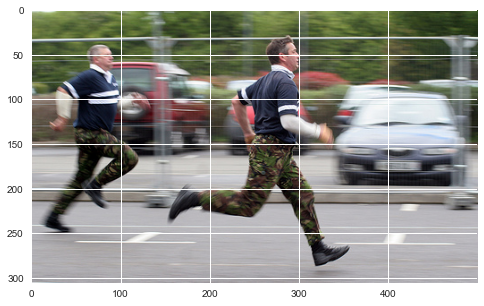

In [ ]:
plt.style.use("seaborn")
for i in range(1):
    idx = np.random.randint(0,1000)
    all_img_names = list(encoding_test.keys())
    img_name = test[idx]
    photo_2048 = encoding_test[img_name].reshape(1,2048)
    
    i = plt.imread("./archive (1)/Images/"+img_name+".jpg")
    
    caption = predict_caption(photo_2048)
    #print(caption)
    
    plt.title(caption)
    plt.imshow(i)
    plt.axis("off")
    plt.show()